In [29]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
!pip install arch
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [34]:
import yfinance as yf

start = '2018-08-01'
end = '2023-08-01'


# Retrieve data using yfinance
dis = yf.download('ITC.NS', start=start, end=end)
tcs = yf.download('TCS.NS', start=start, end=end)
rela = yf.download('RELIANCE.NS', start=start, end=end)
hdfcbank = yf.download('HDFCBANK.NS', start=start, end=end)
infy = yf.download('INFY.NS', start=start, end=end)
adani= yf.download('ADANIENT.NS', start=start, end=end)
icici = yf.download('ICICIBANK.NS', start=start, end=end)
kotak = yf.download('KOTAKBANK.NS', start=start, end=end)
lt = yf.download('LT.NS', start=start, end=end)
axis = yf.download('AXISBANK.NS', start=start, end=end)
sbin = yf.download('SBIN.NS', start=start, end=end)
ioc = yf.download('IOC.NS', start=start, end=end)
bharti = yf.download('BHARTIARTL.NS', start=start, end=end)
ongc = yf.download('ONGC.NS', start=start, end=end)
hindul = yf.download('HINDUNILVR.NS', start=start, end=end)
ntpc = yf.download('NTPC.NS', start=start, end=end)
maruti = yf.download('MARUTI.NS', start=start, end=end)
sunpharma = yf.download('SUNPHARMA.NS', start=start, end=end)
tatasteel = yf.download('TATASTEEL.NS', start=start, end=end)
indus = yf.download('INDUSINDBK.NS', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [36]:
stock_symbols = [dis,
tcs ,
rela ,
hdfcbank ,
infy,
adani,
icici,
kotak ,
lt ,
axis ,
sbin ,
ioc ,
bharti,
ongc,
hindul ,
ntpc ,
maruti ,
sunpharma ,
tatasteel,
indus]

In [155]:
dis

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-08-01,298.049988,302.950012,296.100006,301.600006,246.343796,14624672,NaN
2018-08-02,300.500000,303.500000,297.299988,299.200012,244.383484,9847568,-0.007958
2018-08-03,300.000000,305.399994,298.149994,303.950012,248.263290,12470372,0.015876
2018-08-06,305.000000,306.899994,300.000000,301.799988,246.507141,7683950,-0.007074
2018-08-07,302.950012,304.200012,299.750000,301.100006,245.935379,7188627,-0.002319
...,...,...,...,...,...,...,...
2023-07-25,467.899994,468.500000,455.399994,462.299988,455.608521,43534718,-0.019200
2023-07-26,464.899994,473.000000,462.049988,472.250000,465.414520,18143422,0.021523
2023-07-27,474.399994,475.149994,461.100006,465.049988,458.318726,13989457,-0.015246


In [54]:
def calculate_returns(df):
  returns = 100 * df.Close.pct_change().dropna()
  return returns

In [65]:
def plot_pa(returns):
  plot_pacf(returns**2)
  plt.show()

In [218]:
def plot_volatility_pred(returns, p, q):
      rolling_predictions = []
      test_size = 1200

      for i in range(test_size):
          train = returns[:-(test_size-i)]
          model = arch_model(train, p=p, q=q)
          model_fit = model.fit(disp='off')
          pred = model_fit.forecast(horizon=1)
          rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
      rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-1200:])

      plt.figure(figsize=(10,4))
      true, = plt.plot(returns[-1200:])
      preds, = plt.plot(rolling_predictions)
      plt.title('Volatility Prediction - Rolling Forecast', fontsize=9)
      plt.legend(['True Returns', 'Predicted Volatility'], fontsize=6)

      high_vol_threshold = np.percentile(rolling_predictions, 90)
      low_vol_threshold = np.percentile(rolling_predictions, 10)
      print(high_vol_threshold)
      print(low_vol_threshold)
      return rolling_predictions

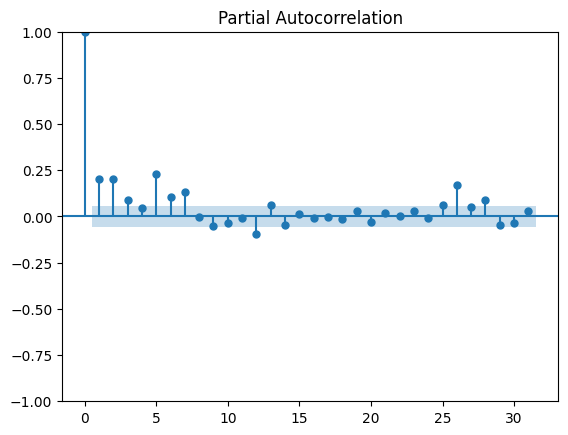

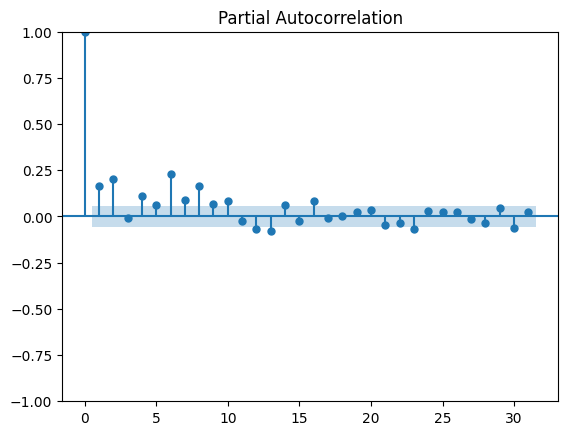

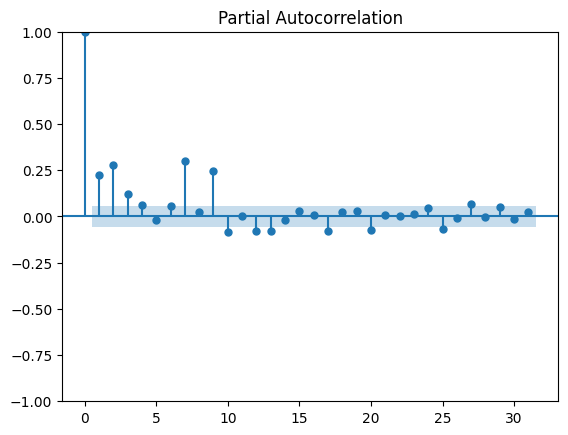

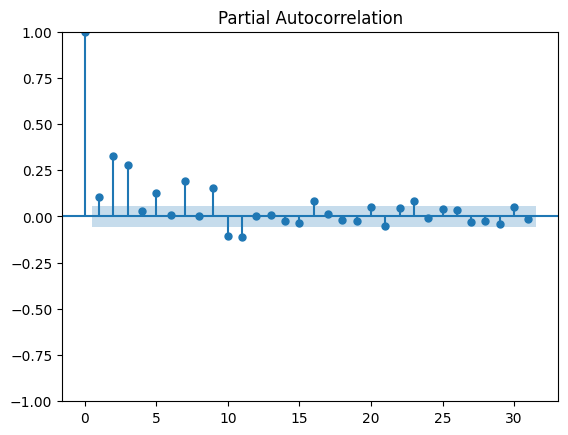

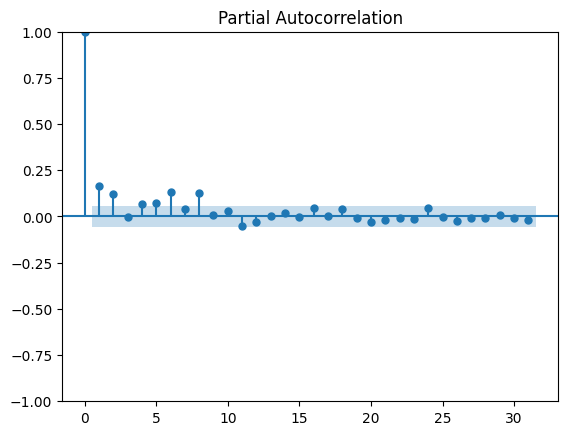

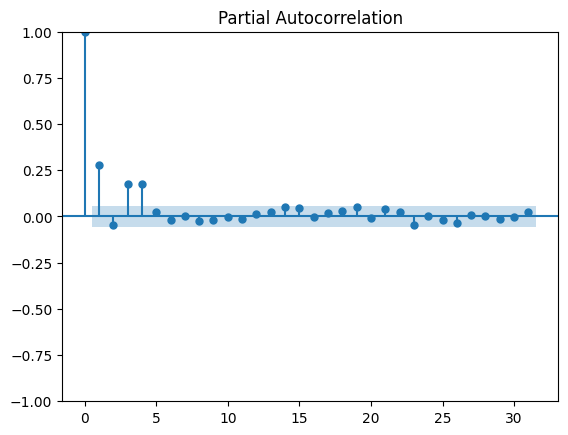

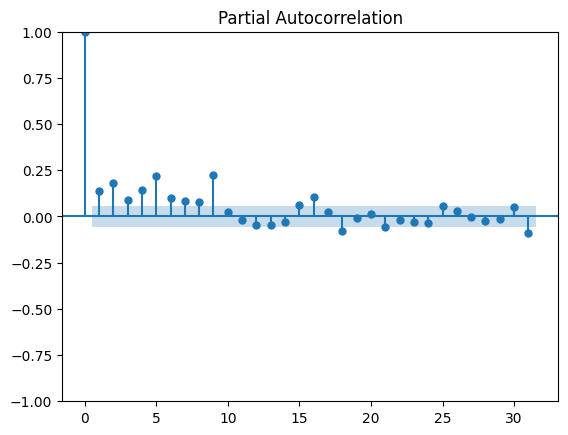

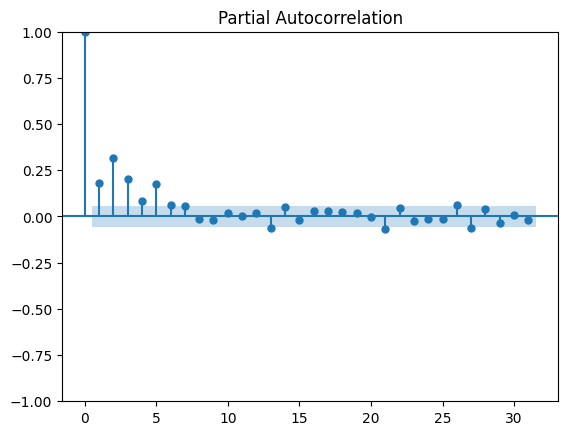

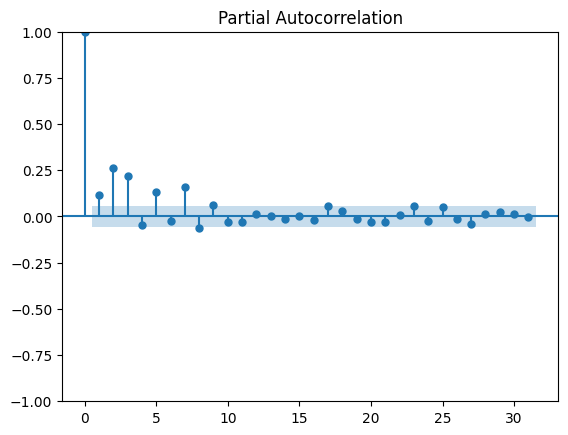

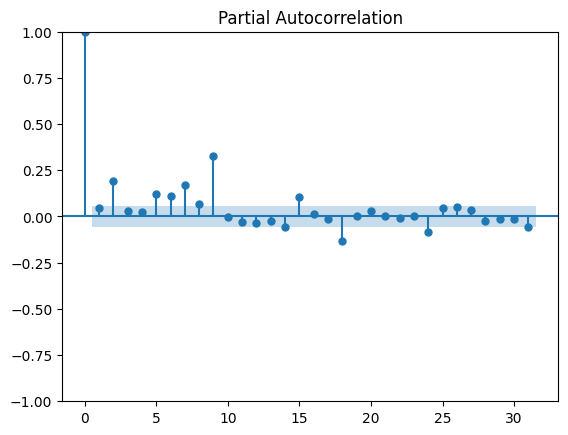

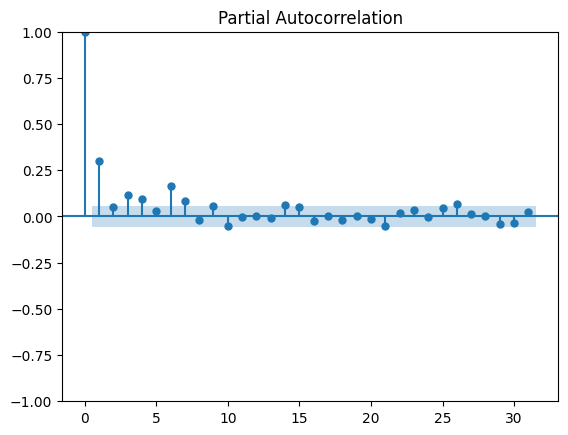

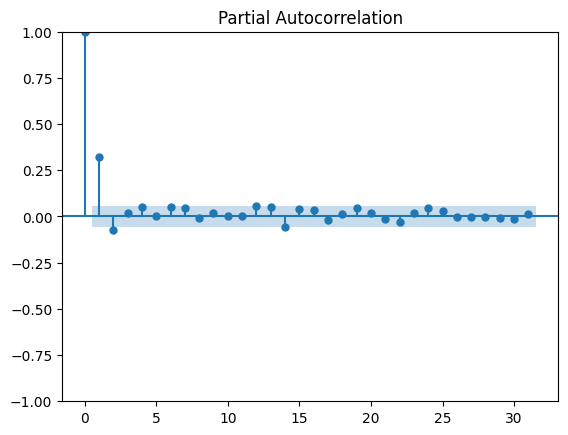

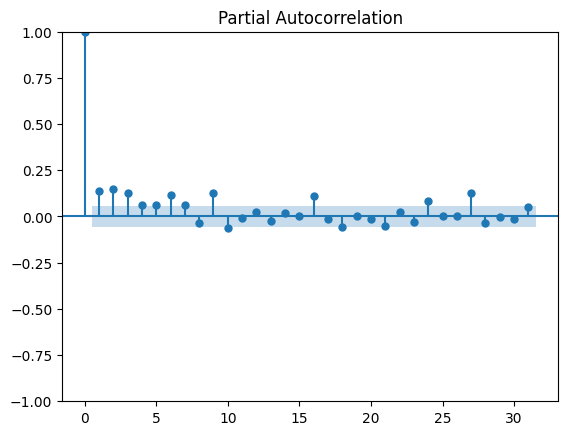

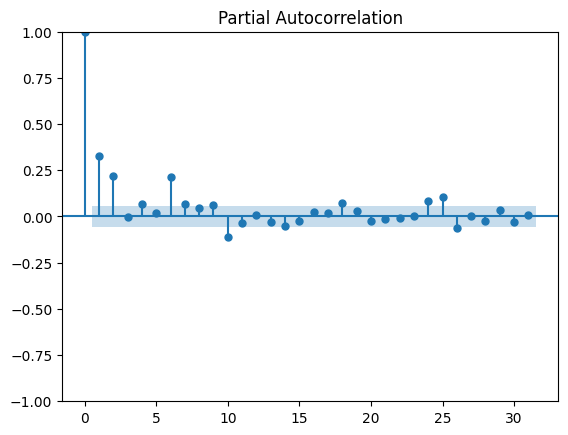

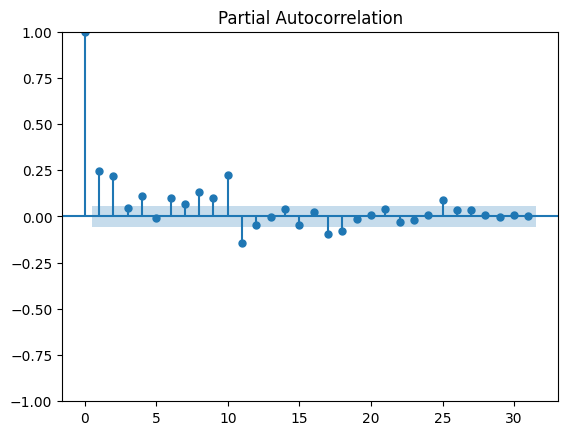

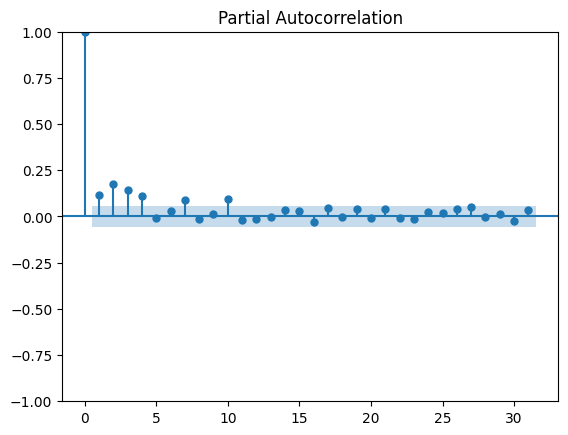

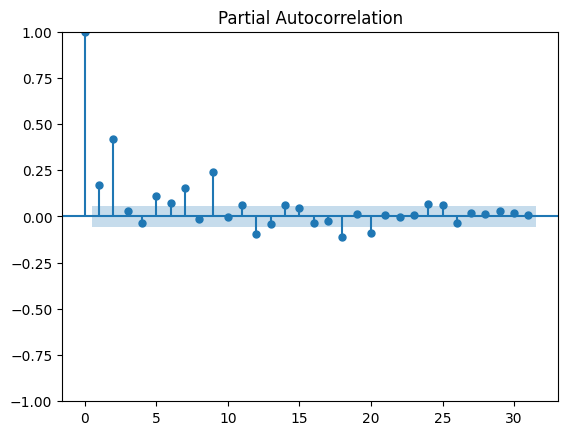

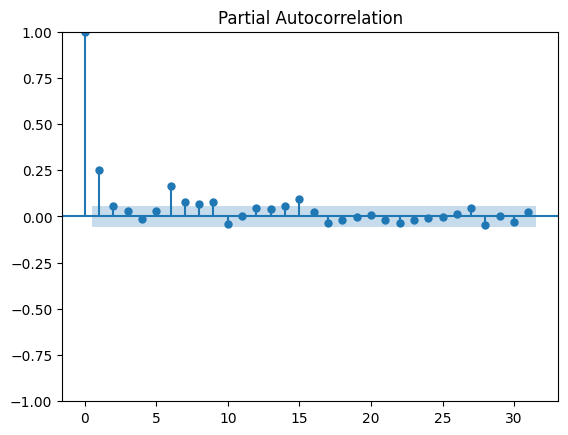

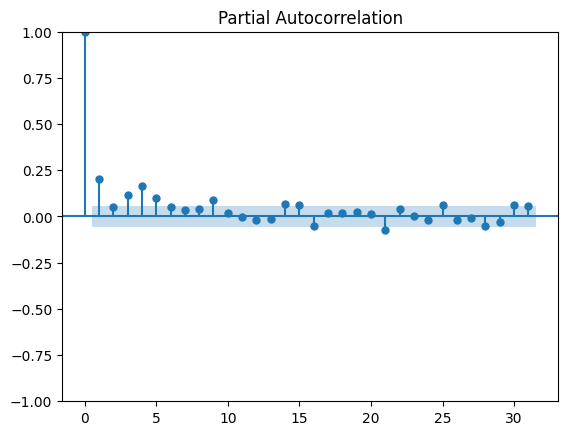

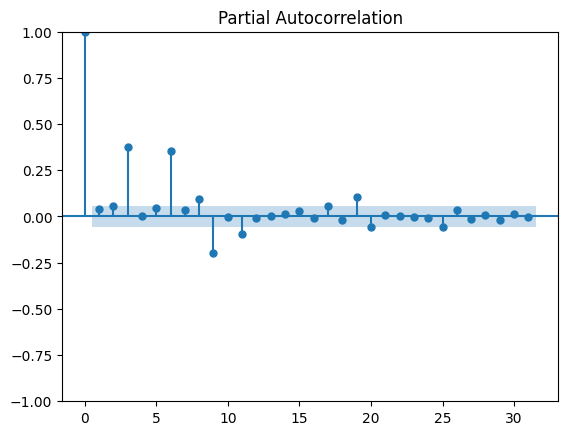

In [66]:
for stock in stock_symbols:
    returns=calculate_returns(stock)
    plot_pa(returns)



In [220]:
!pip install arch
from arch import arch_model

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4366.525292378198
Iteration:      2,   Func. Count:     18,   Neg. LLF: 6077.212093741829
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5355.540918703517
Iteration:      4,   Func. Count:     36,   Neg. LLF: 7000.5162100081525
Iteration:      5,   Func. Count:     44,   Neg. LLF: 79481.52597657555
Iteration:      6,   Func. Count:     52,   Neg. LLF: 12535.987626080514
Iteration:      7,   Func. Count:     60,   Neg. LLF: 2376.1603447403104
Iteration:      8,   Func. Count:     69,   Neg. LLF: 2279.515907874491
Iteration:      9,   Func. Count:     77,   Neg. LLF: 2277.8167862650553
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2273.426716964275
Iteration:     11,   Func. Count:     92,   Neg. LLF: 2273.4634041855916
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2273.3513756185557
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2273.312862366859
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2273

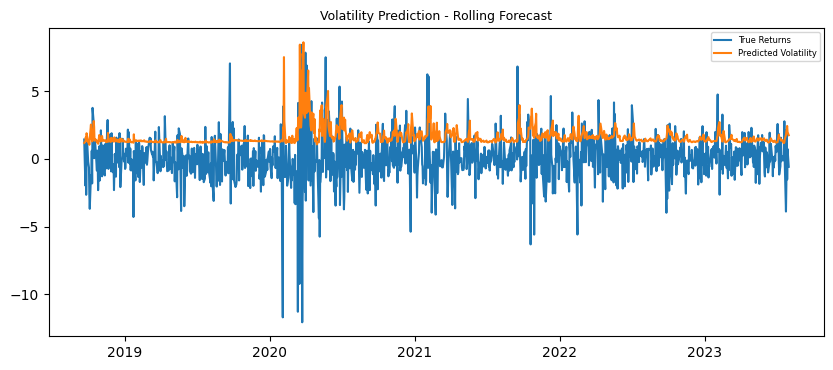

In [221]:
returns_dis= calculate_returns(dis)
model = arch_model(returns_dis, p=4, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_dis=plot_volatility_pred(returns_dis, 4, 0)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4132.234851818961
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6450.0645367845555
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2445.3157105615055
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2425.1980312003634
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2332.505447261562
Iteration:      6,   Func. Count:     42,   Neg. LLF: 2281.378440247535
Iteration:      7,   Func. Count:     47,   Neg. LLF: 2281.3730871526463
Iteration:      8,   Func. Count:     52,   Neg. LLF: 2281.3725630830722
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2281.3724849140913
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2281.3724849140767
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2281.3724849140913
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
2.012875911569621
1.365468721366391


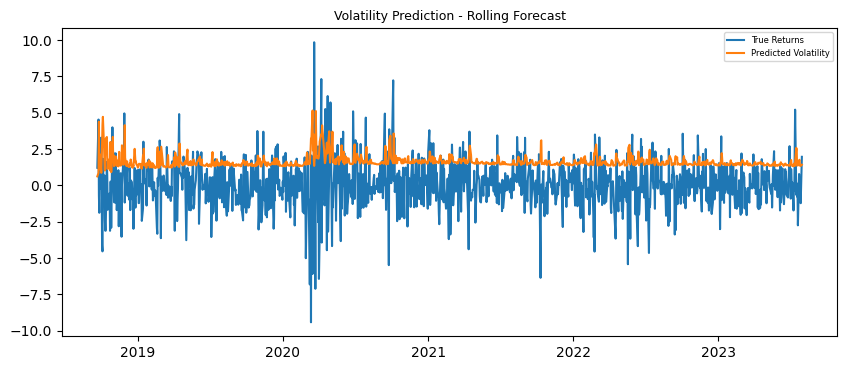

In [222]:
returns_tcs= calculate_returns(tcs)
model = arch_model(returns_tcs, p=2, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_tcs=plot_volatility_pred(returns_tcs, 2, 0)

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3536.943348115644
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4462.247350323087
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4311.335472875926
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5926.499370396917
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2680.5227339754592
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2542.145025129208
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2571.8371093071282
Iteration:      8,   Func. Count:     70,   Neg. LLF: 2482.7548706000516
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2487.799000233951
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2471.801891910675
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2471.79656135236
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2471.796357239393
Iteration:     13,   Func. Count:    107,   Neg. LLF: 2471.796356231076
Iteration:     14,   Func. Count:    113,   Neg. LLF: 2471.796

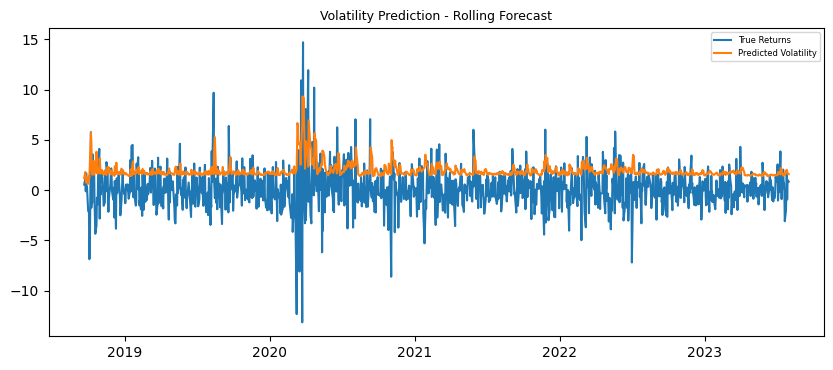

In [223]:
returns_rela= calculate_returns(rela)
model = arch_model(returns_rela, p=4, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_rela=plot_volatility_pred(returns_rela, 4, 0)

In [298]:
!pip install arch
from arch import arch_model

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3913.491994558961
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5753.166831223812
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6291.853048817785
Iteration:      4,   Func. Count:     32,   Neg. LLF: 7431.5563068644515
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2410.328893678975
Iteration:      6,   Func. Count:     46,   Neg. LLF: 3457.804017501548
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2356.4968717029506
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2241.3384340239163
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2240.449684488329
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2240.338390097073
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2240.3265409189007
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2240.3258492544114
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2240.3254049780126
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2240

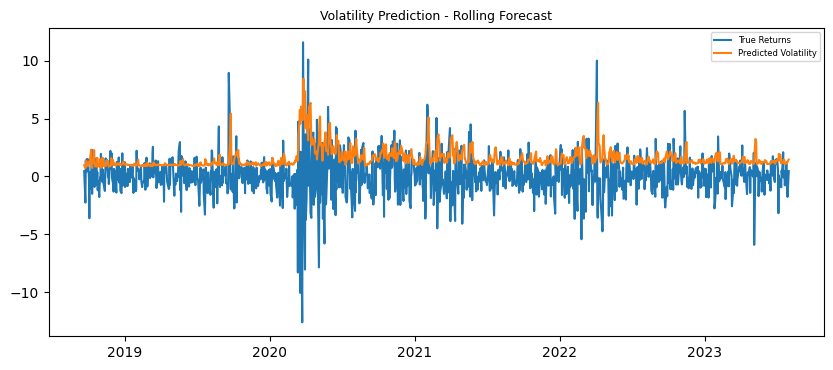

In [300]:
returns_hdfcbank= calculate_returns(hdfcbank)
model = arch_model(returns_hdfcbank, p=3, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_hdfcbank=plot_volatility_pred(returns_hdfcbank, 3, 0)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5339.464270401834
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5457.778978083798
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2634.7379444376206
Iteration:      4,   Func. Count:     28,   Neg. LLF: 324127.4403599755
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3244.003760583303
Iteration:      6,   Func. Count:     40,   Neg. LLF: 2452.288408537846
Iteration:      7,   Func. Count:     46,   Neg. LLF: 2435.44384851194
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2435.404703199084
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2435.401743987749
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2435.4017191754547
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2435.4017180685473
Iteration:     12,   Func. Count:     70,   Neg. LLF: 2435.4017180685332
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2435.4017180685473
            Iterations: 

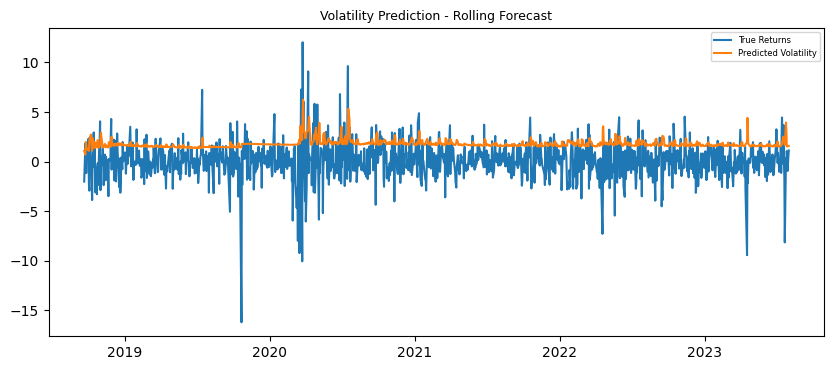

In [225]:
returns_infy= calculate_returns(infy)
model = arch_model(returns_infy, p=2, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_infy=plot_volatility_pred(returns_infy, 2, 0)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5417.297970963898
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5369.0851929699065
Iteration:      3,   Func. Count:     19,   Neg. LLF: 3275.9092459968715
Iteration:      4,   Func. Count:     24,   Neg. LLF: 3236.766763486052
Iteration:      5,   Func. Count:     29,   Neg. LLF: 3222.211262141913
Iteration:      6,   Func. Count:     33,   Neg. LLF: 3222.206740456546
Iteration:      7,   Func. Count:     37,   Neg. LLF: 3222.2057739763054
Iteration:      8,   Func. Count:     41,   Neg. LLF: 3222.2057671057005
Iteration:      9,   Func. Count:     44,   Neg. LLF: 3222.2057671056555
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3222.2057671057005
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 9
3.8478704650981044
2.9506406981912625


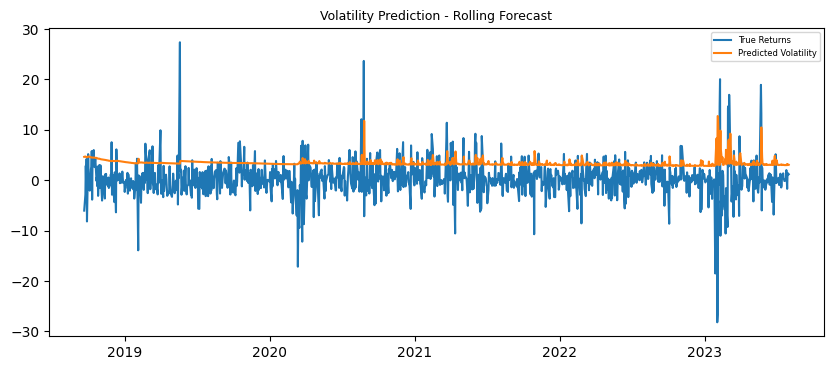

In [226]:
returns_adani= calculate_returns(adani)
model = arch_model(returns_adani, p=1, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_adani=plot_volatility_pred(returns_adani, 1, 0)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5271.240544421902
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5552.978120513736
Iteration:      3,   Func. Count:     25,   Neg. LLF: 169968.9261416819
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1043774.2991436375
Iteration:      5,   Func. Count:     39,   Neg. LLF: 7856.71330398598
Iteration:      6,   Func. Count:     46,   Neg. LLF: 3430.2284749020964
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2607.1153567992433
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2532.09155119204
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2531.707203018067
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2531.6308077213544
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2531.623537568124
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2531.6225042927063
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2531.6224514485175
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2531.6

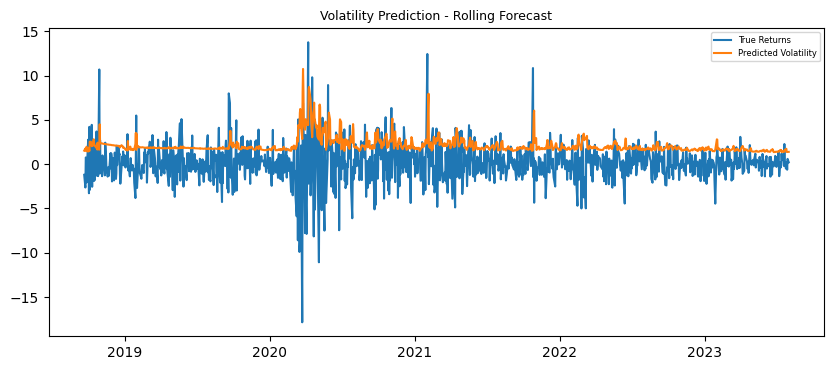

In [227]:
returns_icici= calculate_returns(icici)
model = arch_model(returns_icici, p=3, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_icici=plot_volatility_pred(returns_icici, 3, 0)

Iteration:      1,   Func. Count:     11,   Neg. LLF: 3447.7363292985756
Iteration:      2,   Func. Count:     25,   Neg. LLF: 1420674.9150629481
Iteration:      3,   Func. Count:     37,   Neg. LLF: 165853.74080503092
Iteration:      4,   Func. Count:     48,   Neg. LLF: 11031.633706600127
Iteration:      5,   Func. Count:     59,   Neg. LLF: 3583.2766036977723
Iteration:      6,   Func. Count:     70,   Neg. LLF: 5914.111425876883
Iteration:      7,   Func. Count:     82,   Neg. LLF: 3525.828070324344
Iteration:      8,   Func. Count:     94,   Neg. LLF: 12442.8917122214
Iteration:      9,   Func. Count:    105,   Neg. LLF: 2759.4104734107104
Iteration:     10,   Func. Count:    117,   Neg. LLF: 2470.183916698171
Iteration:     11,   Func. Count:    128,   Neg. LLF: 2418.7709541783993
Iteration:     12,   Func. Count:    139,   Neg. LLF: 2449.010920027784
Iteration:     13,   Func. Count:    150,   Neg. LLF: 2408.027857685994
Iteration:     14,   Func. Count:    161,   Neg. LLF: 2395

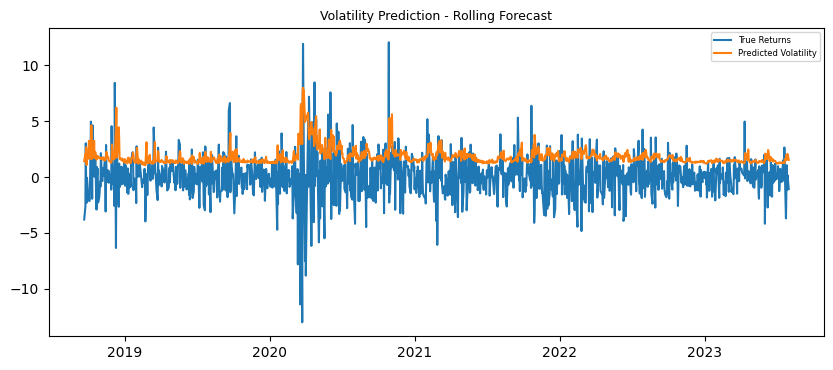

In [228]:
returns_kotak= calculate_returns(kotak)
model = arch_model(returns_kotak, p=7, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_kotak=plot_volatility_pred(returns_kotak, 7, 0)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4430.093502438898
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6126.472477507419
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2641.4123627848794
Iteration:      4,   Func. Count:     32,   Neg. LLF: 110263.0395158772
Iteration:      5,   Func. Count:     39,   Neg. LLF: 10536.604259018302
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2583.808392710906
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2403.392266017463
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2396.901857749755
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2384.6124865554857
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2384.5699783096015
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2384.5683338867448
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2384.568244544351
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2384.5682399560615
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2384

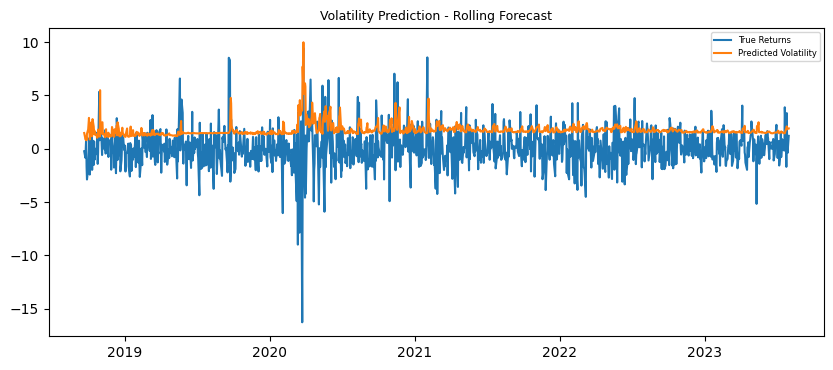

In [229]:
returns_lt= calculate_returns(lt)
model = arch_model(returns_lt, p=3, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_lt=plot_volatility_pred(returns_lt, 3, 0)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5533.387523957139
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4679.651545227976
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1869267.7820565358
Iteration:      4,   Func. Count:     28,   Neg. LLF: 7519.503947562865
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2791.1403910664476
Iteration:      6,   Func. Count:     41,   Neg. LLF: 213007.5119606178
Iteration:      7,   Func. Count:     47,   Neg. LLF: 2636.460592587907
Iteration:      8,   Func. Count:     52,   Neg. LLF: 2635.9754222176207
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2635.9351647924336
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2635.934210458381
Iteration:     11,   Func. Count:     67,   Neg. LLF: 2635.934208554442
Iteration:     12,   Func. Count:     71,   Neg. LLF: 2635.9342085544313
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2635.934208554442
            Iterations:

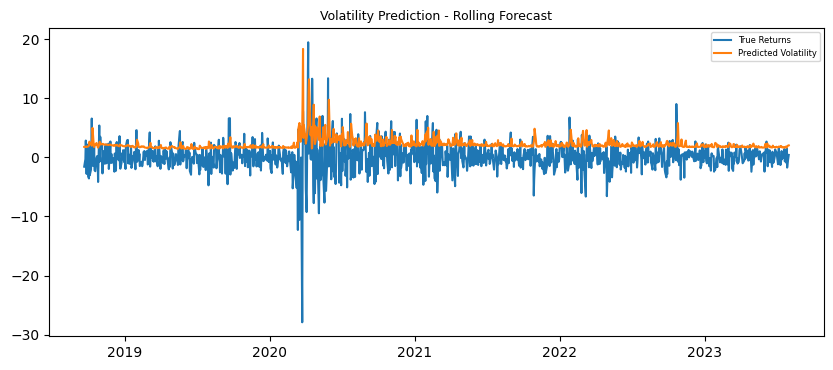

In [230]:
returns_axis= calculate_returns(axis)
model = arch_model(returns_axis, p=2, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_axis=plot_volatility_pred(returns_axis, 2, 0)

Iteration:      1,   Func. Count:      9,   Neg. LLF: 4772.200073303796
Iteration:      2,   Func. Count:     20,   Neg. LLF: 6108.184623489104
Iteration:      3,   Func. Count:     31,   Neg. LLF: 10239.184661822004
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4122.298180356705
Iteration:      5,   Func. Count:     49,   Neg. LLF: 4459.0011404844545
Iteration:      6,   Func. Count:     58,   Neg. LLF: 4041.0076473789823
Iteration:      7,   Func. Count:     67,   Neg. LLF: 8276.544442411203
Iteration:      8,   Func. Count:     76,   Neg. LLF: 3327.7335605449052
Iteration:      9,   Func. Count:     85,   Neg. LLF: 2673.993558994064
Iteration:     10,   Func. Count:     94,   Neg. LLF: 2653.4828543627236
Iteration:     11,   Func. Count:    103,   Neg. LLF: 2636.3162354478764
Iteration:     12,   Func. Count:    112,   Neg. LLF: 2620.8665262434665
Iteration:     13,   Func. Count:    120,   Neg. LLF: 2620.836487733764
Iteration:     14,   Func. Count:    128,   Neg. LLF: 262

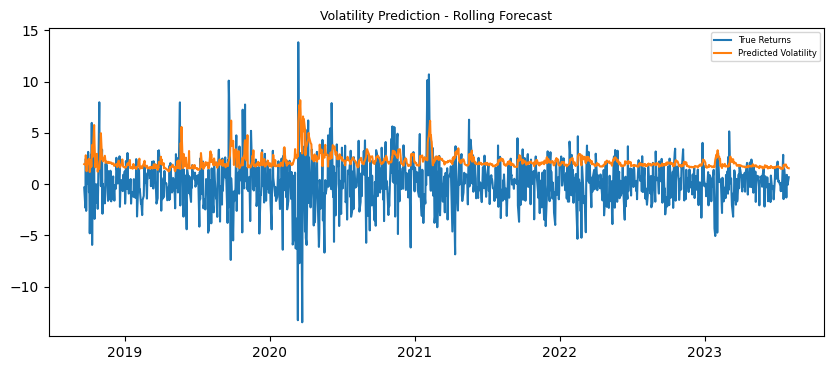

In [231]:
returns_sbin= calculate_returns(sbin)
model = arch_model(returns_sbin, p=5, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_sbin=plot_volatility_pred(returns_sbin, 5, 0)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4464.514645287534
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6619.086500699714
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2595.321920924118
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2532.8870179467517
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2527.665781931846
Iteration:      6,   Func. Count:     35,   Neg. LLF: 2527.6600052055232
Iteration:      7,   Func. Count:     39,   Neg. LLF: 2527.6599796826667
Iteration:      8,   Func. Count:     42,   Neg. LLF: 2527.6599796825235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2527.6599796826667
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8
2.569798290348346
1.8052903347444706


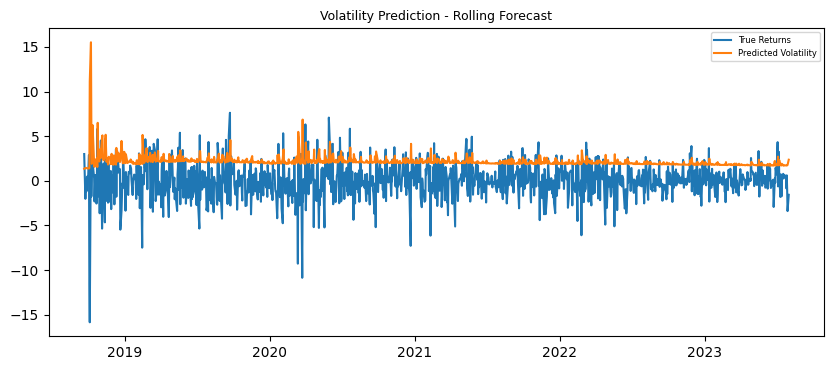

In [232]:
returns_ioc= calculate_returns(ioc)
model = arch_model(returns_ioc, p=1, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_ioc=plot_volatility_pred(returns_ioc, 1, 0)

Iteration:      1,   Func. Count:     11,   Neg. LLF: 4660.313461480073
Iteration:      2,   Func. Count:     24,   Neg. LLF: 6139.825572336344
Iteration:      3,   Func. Count:     37,   Neg. LLF: 16702.78504538862
Iteration:      4,   Func. Count:     48,   Neg. LLF: 69636.79734783192
Iteration:      5,   Func. Count:     59,   Neg. LLF: 14349.613933623288
Iteration:      6,   Func. Count:     70,   Neg. LLF: 6814.6078022439415
Iteration:      7,   Func. Count:     81,   Neg. LLF: 2715.664400664999
Iteration:      8,   Func. Count:     92,   Neg. LLF: 2669.6709058067618
Iteration:      9,   Func. Count:    104,   Neg. LLF: 2669.140907253646
Iteration:     10,   Func. Count:    115,   Neg. LLF: 2646.8443270596517
Iteration:     11,   Func. Count:    126,   Neg. LLF: 2612.2527013128565
Iteration:     12,   Func. Count:    138,   Neg. LLF: 2570.8285150534825
Iteration:     13,   Func. Count:    149,   Neg. LLF: 2562.7909955005216
Iteration:     14,   Func. Count:    160,   Neg. LLF: 258

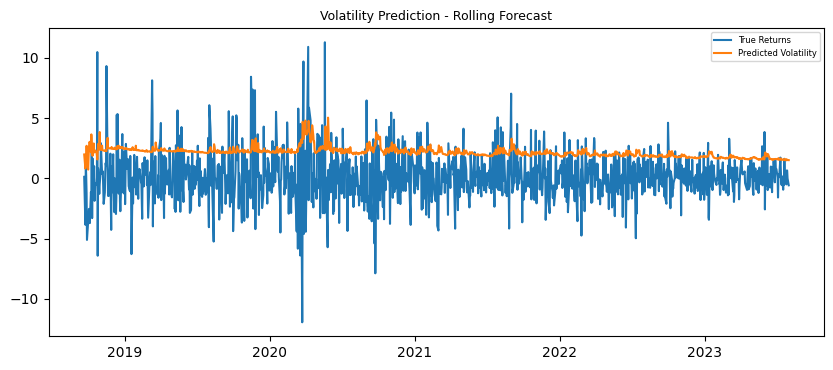

In [233]:
returns_bharti= calculate_returns(bharti)
model = arch_model(returns_bharti, p=7, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_bharti=plot_volatility_pred(returns_bharti, 7, 0)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4663.542356011599
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5890.448013058788
Iteration:      3,   Func. Count:     22,   Neg. LLF: 199259.6073735386
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2956.682953728089
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2758.825578237458
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2718.948837246992
Iteration:      7,   Func. Count:     46,   Neg. LLF: 2718.7633333684953
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2718.7543613118373
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2718.7533399267036
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2718.753190848156
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2718.7531805754534
Iteration:     12,   Func. Count:     71,   Neg. LLF: 2718.7531799718604
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2718.7531799718604
            Iterations

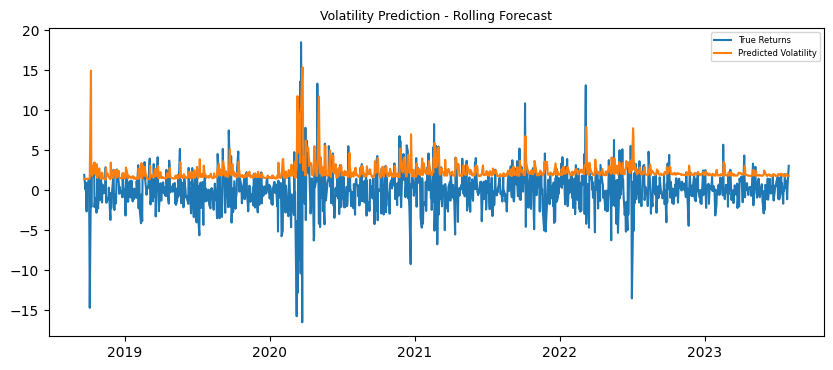

In [234]:
returns_ongc= calculate_returns(ongc)
model = arch_model(returns_ongc, p=2, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_ongc=plot_volatility_pred(returns_ongc, 2, 0)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3964.7884111643593
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6179.105872278549
Iteration:      3,   Func. Count:     25,   Neg. LLF: 7131.158257781102
Iteration:      4,   Func. Count:     32,   Neg. LLF: 376833.1211555125
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2297437.723566604
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2457.680964803929
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2170.777106635326
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2165.029527874361
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2164.531913819088
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2164.5129777338634
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2164.512941094682
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2164.5129410947284
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2164.512941094682
            Iterations: 1

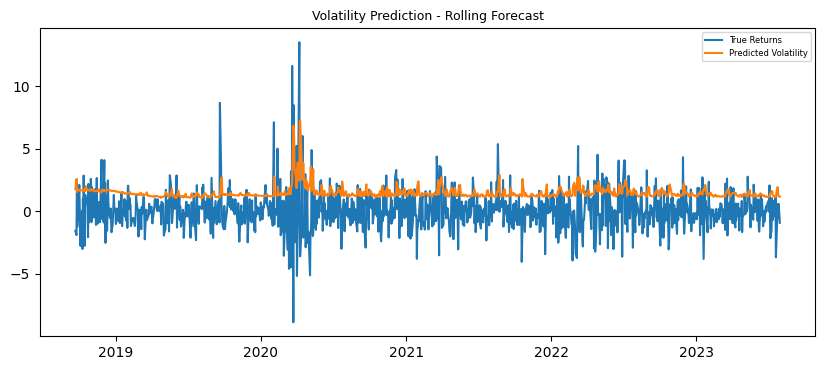

In [235]:
returns_hindul= calculate_returns(hindul)
model = arch_model(returns_hindul, p=3, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_hindul=plot_volatility_pred(returns_hindul, 3, 0)

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4481.50325455645
Iteration:      2,   Func. Count:     18,   Neg. LLF: 6098.707678369123
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2727.489182148085
Iteration:      4,   Func. Count:     36,   Neg. LLF: 98937.62612601803
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2603642.437248752
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2449.216328012641
Iteration:      7,   Func. Count:     60,   Neg. LLF: 2460.2217045664547
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2597.7756814034
Iteration:      9,   Func. Count:     77,   Neg. LLF: 2404.692383458675
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2418.763480420941
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2404.2655078175812
Iteration:     12,   Func. Count:    101,   Neg. LLF: 2404.263756612527
Iteration:     13,   Func. Count:    109,   Neg. LLF: 2404.211124377525
Iteration:     14,   Func. Count:    116,   Neg. LLF: 2404.211120

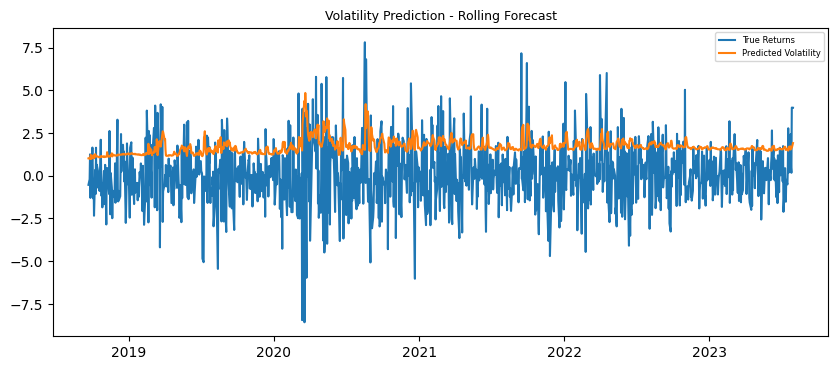

In [236]:
returns_ntpc= calculate_returns(ntpc)
model = arch_model(returns_ntpc, p=4, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_ntpc=plot_volatility_pred(returns_ntpc, 4, 0)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5173.858374260154
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5667.940765166813
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3350.623137878761
Iteration:      4,   Func. Count:     32,   Neg. LLF: 36702.29136553652
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2798.192110657111
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2496.137232549423
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2524.7562956784977
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2496.9010922234124
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2493.500282901975
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2493.4961188872767
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2493.4959840920324
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2493.4959729495286
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2493.4959729494744
Optimization terminated successfully    (Exit mode 0)
    

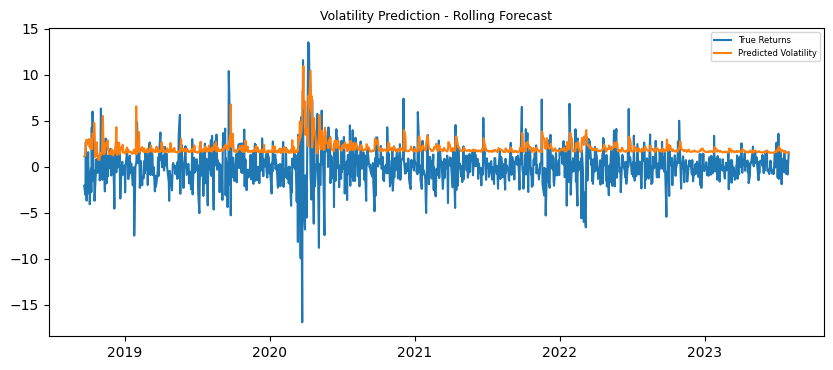

In [237]:
returns_maruti= calculate_returns(maruti)
model = arch_model(returns_maruti, p=3, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_maruti=plot_volatility_pred(returns_maruti, 3, 0)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3485.659675984555
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5089.1895148139465
Iteration:      3,   Func. Count:     26,   Neg. LLF: 100605.86740950585
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2634.320229897594
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2856.5007233032866
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2519.242310297235
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2471.1821717914986
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2470.811446425882
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2470.7961451562405
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2470.7945694973732
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2470.7945267840732
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2470.794526783981
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2470.7945267840732
            Iteratio

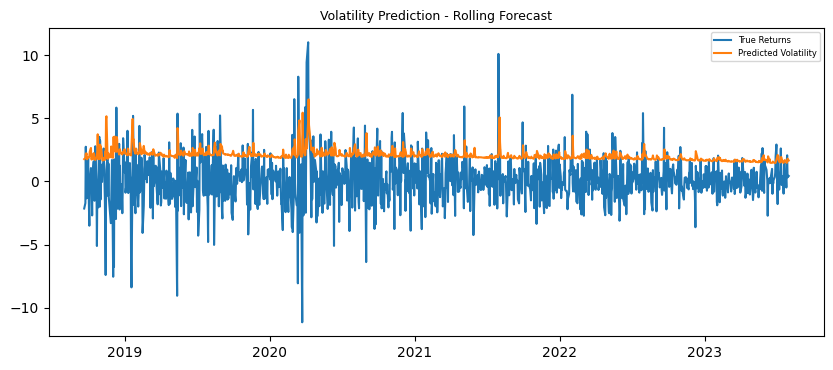

In [238]:
returns_sunpharma= calculate_returns(sunpharma)
model = arch_model(returns_sunpharma, p=3, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_sunpharma=plot_volatility_pred(returns_sunpharma, 3, 0)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5604.544317866304
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5897.402808501913
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3007.7420304167063
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4697.750524048352
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4736.907854860854
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2961.2662817505475
Iteration:      7,   Func. Count:     47,   Neg. LLF: 2844.950012740237
Iteration:      8,   Func. Count:     52,   Neg. LLF: 2844.8626648253653
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2844.8383119127607
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2844.836318351492
Iteration:     11,   Func. Count:     67,   Neg. LLF: 2844.8362780150983
Iteration:     12,   Func. Count:     71,   Neg. LLF: 2844.836278015155
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2844.8362780150983
            Iterations

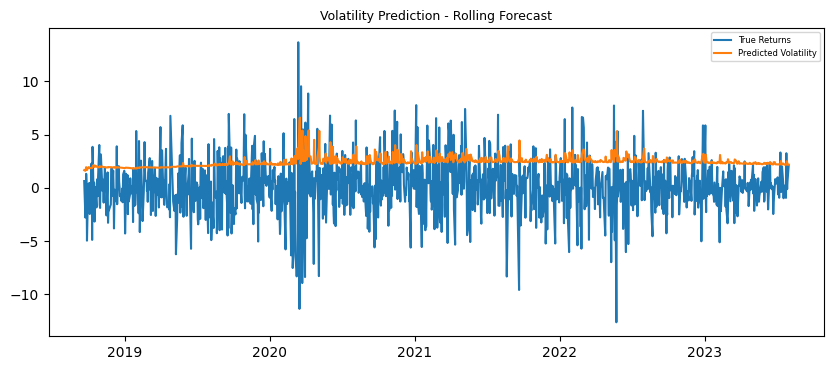

In [239]:
returns_tatasteel= calculate_returns(tatasteel)
model = arch_model(returns_tatasteel, p=2, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_tatasteel=plot_volatility_pred(returns_tatasteel, 2, 0)

In [115]:
!pip install arch
from arch import arch_model

Iteration:      1,   Func. Count:     10,   Neg. LLF: 5370.137131677611
Iteration:      2,   Func. Count:     21,   Neg. LLF: 2650949.9877099707
Iteration:      3,   Func. Count:     31,   Neg. LLF: 9228.283108573
Iteration:      4,   Func. Count:     41,   Neg. LLF: 476671.08638224885
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5823.702875036335
Iteration:      6,   Func. Count:     61,   Neg. LLF: 5067.542449528849
Iteration:      7,   Func. Count:     71,   Neg. LLF: 4585.872343057193
Iteration:      8,   Func. Count:     81,   Neg. LLF: 3837.4354307234794
Iteration:      9,   Func. Count:     91,   Neg. LLF: 3019.6452309870083
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2933.496603674551
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2940.6055118380873
Iteration:     12,   Func. Count:    122,   Neg. LLF: 2896.661144615733
Iteration:     13,   Func. Count:    132,   Neg. LLF: 2922.0626396810853
Iteration:     14,   Func. Count:    142,   Neg. LLF: 2877.11

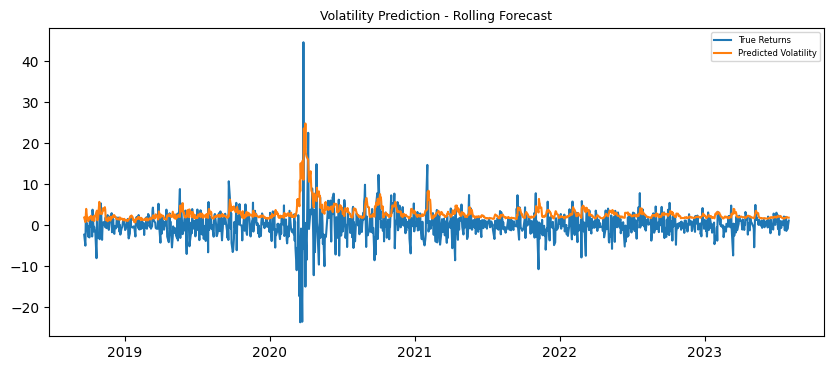

In [240]:
returns_indus= calculate_returns(indus)
model = arch_model(returns_indus, p=6, q=0)
model_fit = model.fit()
model_fit.summary()
rolling_predictions_indus=plot_volatility_pred(returns_indus, 6, 0)

Text(0.5, 1.0, 'Volatility Prediction for  - Next 7 Days')

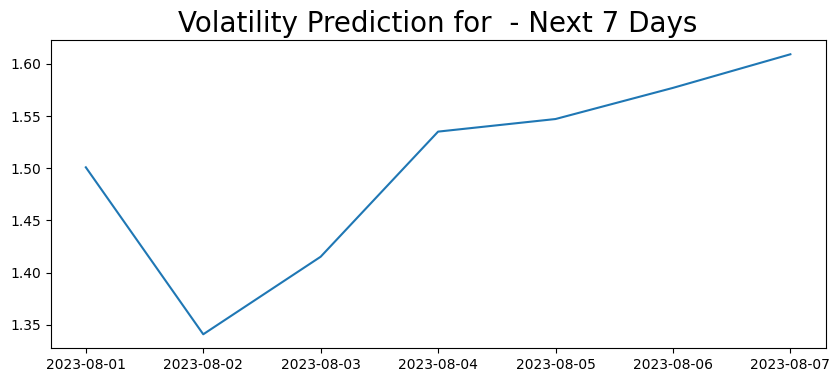

In [302]:
train = returns_dis
model = arch_model(train, p=4, q=0)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)

future_dates = [returns_dis.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction for  - Next 7 Days', fontsize=20)

The hypothesis is that when the predicted volatility of the market is low, it may be a good time to buy (go long) financial assets, and when the predicted volatility is high, it may be a good time to sell (exit long positions) or stay out of the market.


2.1575383628291975
1.2384263886258098


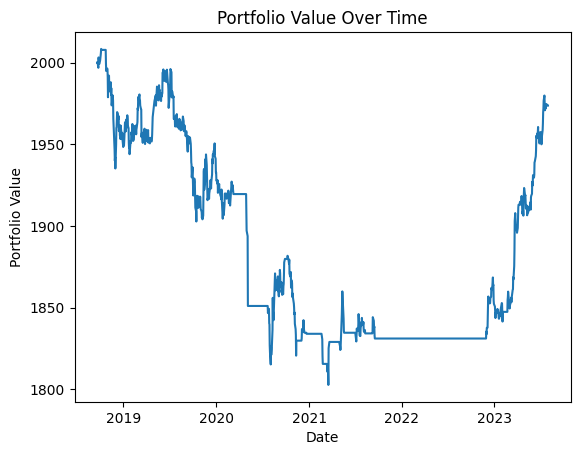

Final Portfolio Value: $ 1973.682571170292


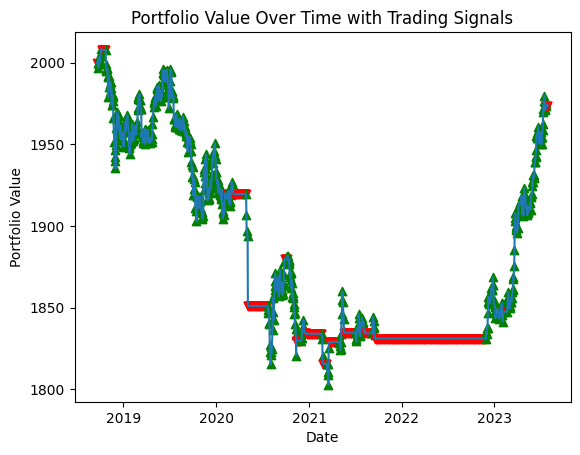

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
dis['Returns'] = dis['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_dis, 90)
low_vol_threshold = np.percentile(rolling_predictions_dis, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 2000  # Initial cash balance
portfolio_value = [2000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_dis)):

    if rolling_predictions_dis[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_dis[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + dis['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(dis.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(dis.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_dis)):
    if positions[i] == 1:
        plt.scatter(dis.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(dis.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.012875911569621
1.365468721366391


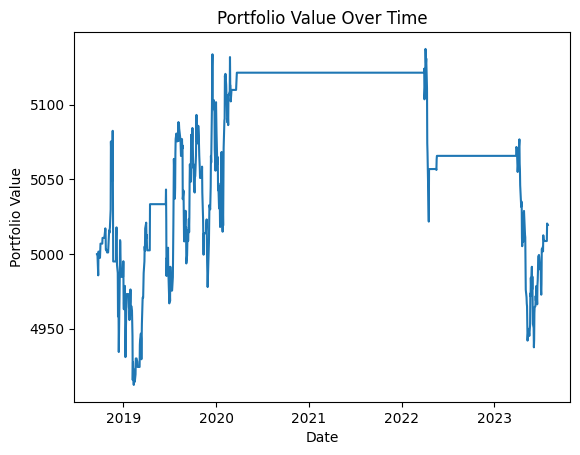

Final Portfolio Value: $ 5019.515956837522


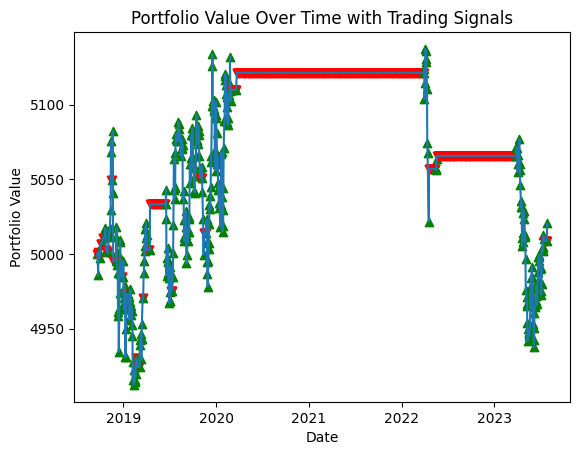

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
tcs['Returns'] = tcs['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_tcs, 90)
low_vol_threshold = np.percentile(rolling_predictions_tcs, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_tcs)):

    if rolling_predictions_tcs[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_tcs[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + tcs['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(tcs.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(tcs.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_tcs)):
    if positions[i] == 1:
        plt.scatter(tcs.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(tcs.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.44684879321934
1.516151536952876


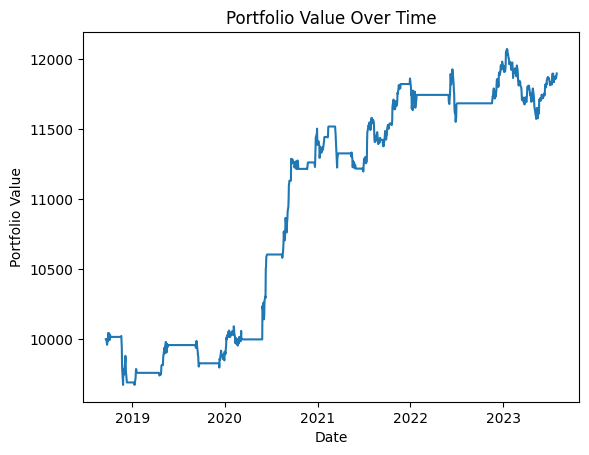

Final Portfolio Value: $ 11898.733965705216


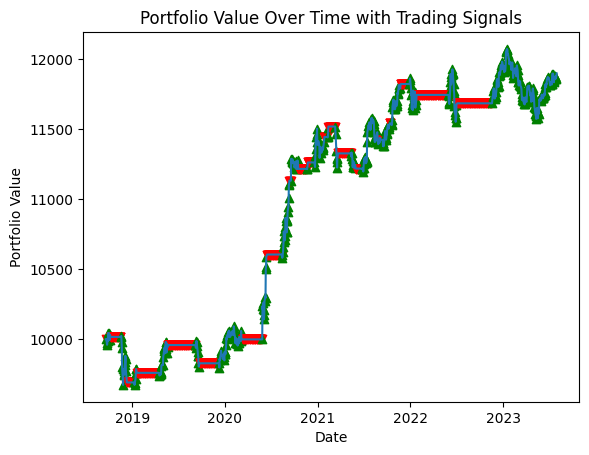

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
rela['Returns'] = rela['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_rela, 90)
low_vol_threshold = np.percentile(rolling_predictions_rela, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_rela)):

    if rolling_predictions_rela[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_rela[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + rela['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(rela.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(rela.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_rela)):
    if positions[i] == 1:
        plt.scatter(rela.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(rela.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.37270046980128
0.9770724371469562


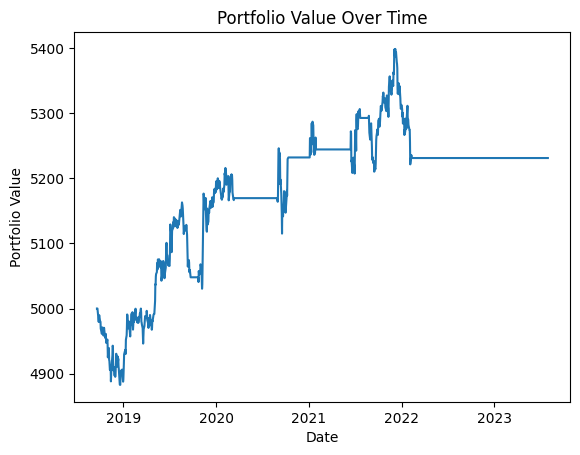

Final Portfolio Value: $ 5230.985419009555


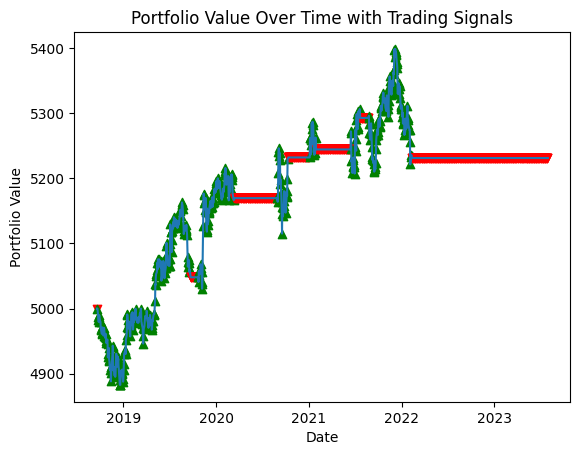

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
hdfcbank['Returns'] = hdfcbank['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_hdfcbank, 90)
low_vol_threshold = np.percentile(rolling_predictions_hdfcbank, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_hdfcbank)):

    if rolling_predictions_hdfcbank[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_hdfcbank[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + hdfcbank['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(hdfcbank.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(hdfcbank.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_hdfcbank)):
    if positions[i] == 1:
        plt.scatter(hdfcbank.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(hdfcbank.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.1231893921520117
1.4925547958697796


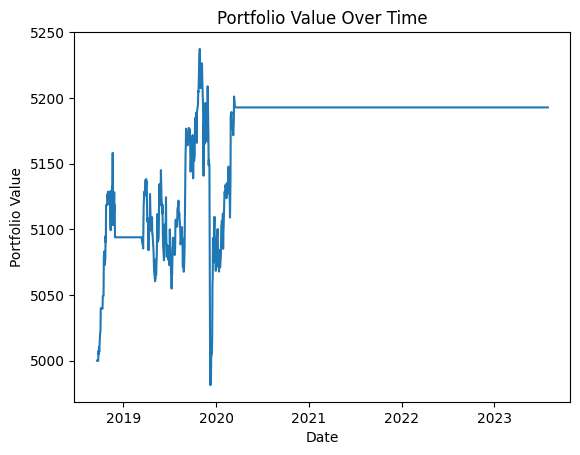

Final Portfolio Value: $ 5192.81558058212


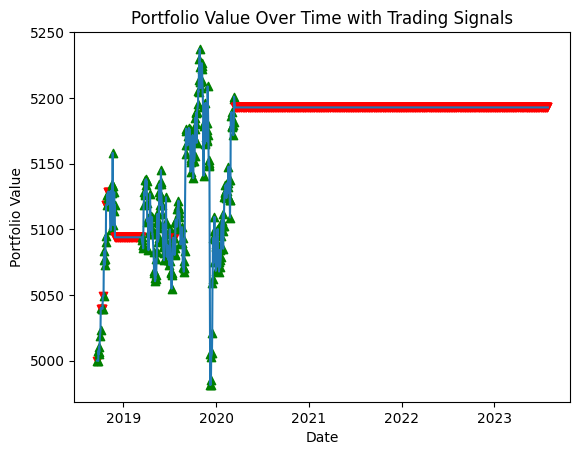

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
infy['Returns'] = infy['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_infy, 90)
low_vol_threshold = np.percentile(rolling_predictions_infy, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_infy)):

    if rolling_predictions_infy[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_infy[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + infy['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(infy.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(infy.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_infy)):
    if positions[i] == 1:
        plt.scatter(infy.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(infy.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




3.8478704650981044
2.9506406981912625


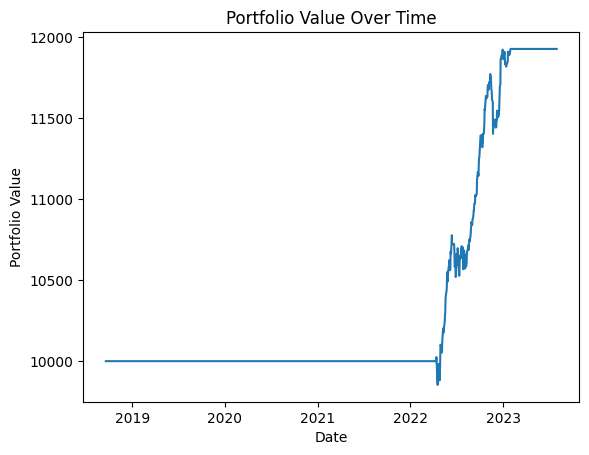

Final Portfolio Value: $ 11928.040185278698


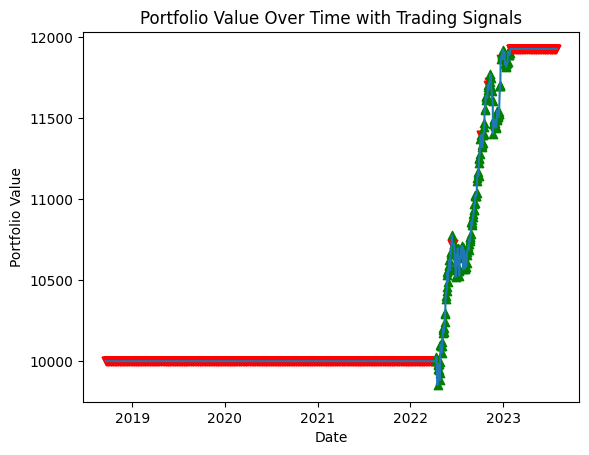

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
adani['Returns'] = adani['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_adani, 90)
low_vol_threshold = np.percentile(rolling_predictions_adani, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_adani)):

    if rolling_predictions_adani[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_adani[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + adani['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(adani.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(adani.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_adani)):
    if positions[i] == 1:
        plt.scatter(adani.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(adani.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.4138408675087173
1.2940768219186718


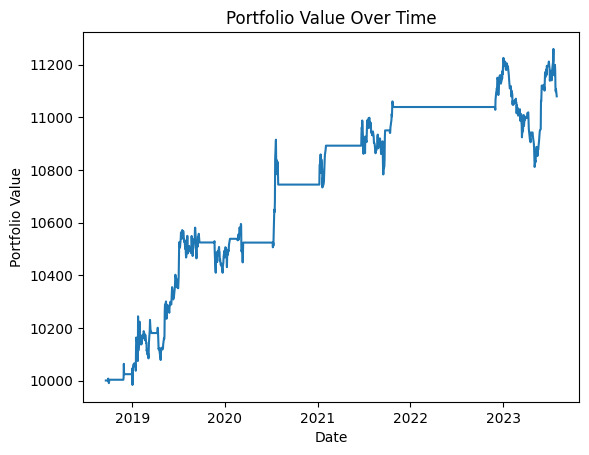

Final Portfolio Value: $ 11079.592481877873


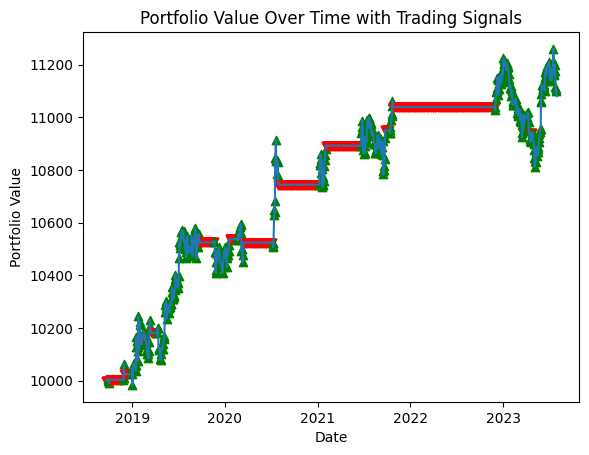

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
kotak['Returns'] = kotak['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_kotak, 90)
low_vol_threshold = np.percentile(rolling_predictions_kotak, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_kotak)):

    if rolling_predictions_kotak[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_kotak[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + kotak['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(kotak.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(kotak.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_kotak)):
    if positions[i] == 1:
        plt.scatter(kotak.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(kotak.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.1468694455844486
1.3927252105694141


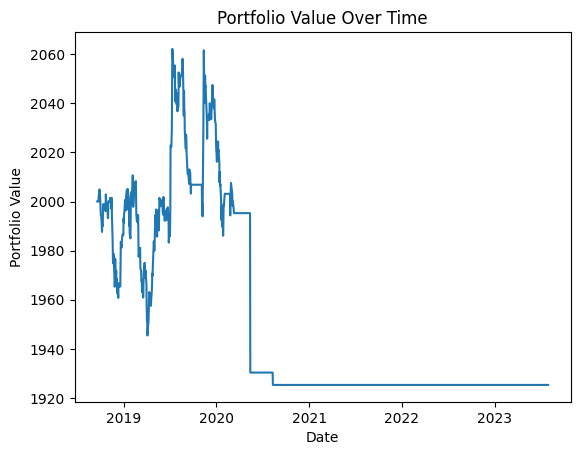

Final Portfolio Value: $ 1925.328306047436


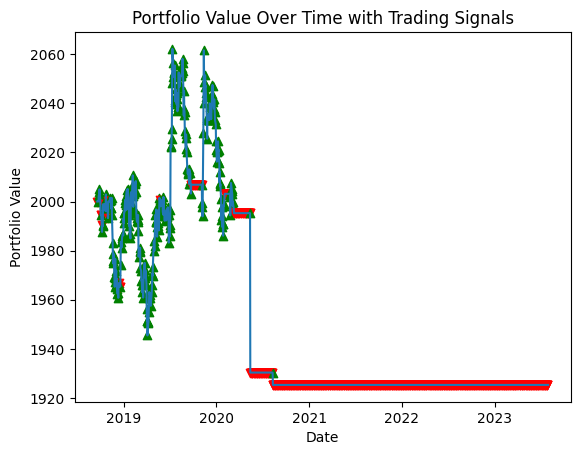

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
lt['Returns'] = lt['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_lt, 90)
low_vol_threshold = np.percentile(rolling_predictions_lt, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 2000  # Initial cash balance
portfolio_value = [2000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_lt)):

    if rolling_predictions_lt[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_lt[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + lt['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(lt.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(lt.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_lt)):
    if positions[i] == 1:
        plt.scatter(lt.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(lt.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.958082051610624
1.659084593868329


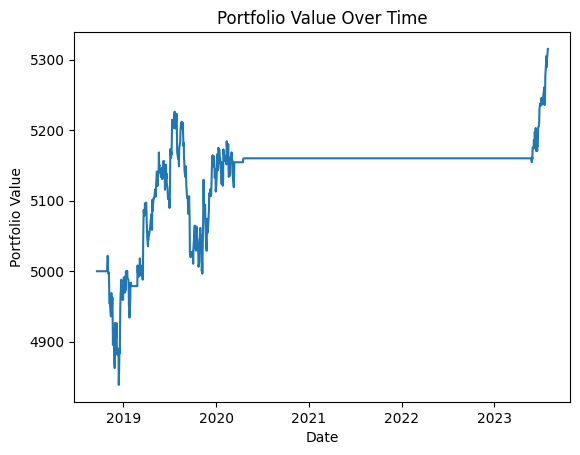

Final Portfolio Value: $ 5315.372107388939


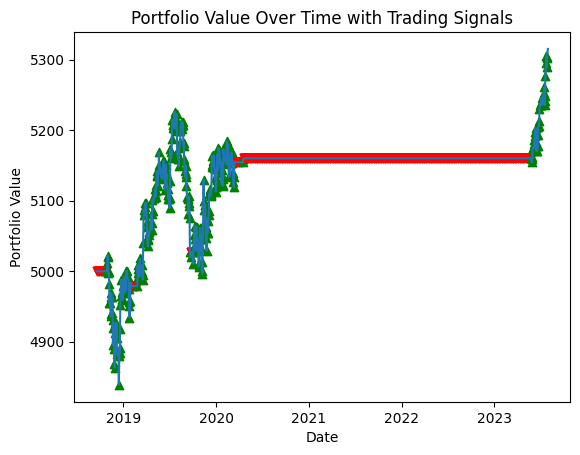

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
axis['Returns'] = axis['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_axis, 90)
low_vol_threshold = np.percentile(rolling_predictions_axis, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_axis)):

    if rolling_predictions_axis[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_axis[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + axis['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(axis.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(axis.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_axis)):
    if positions[i] == 1:
        plt.scatter(axis.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(axis.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.843927905266326
1.649313345047149


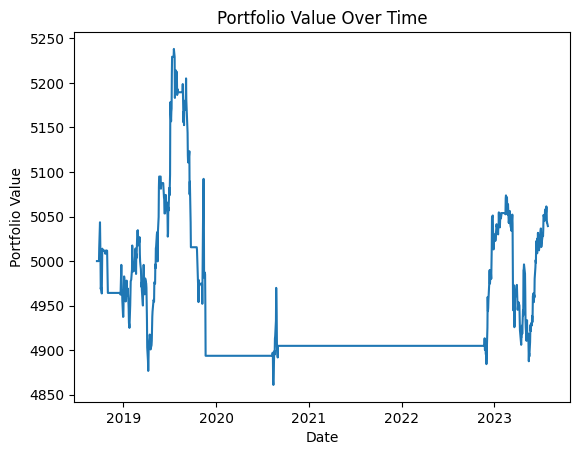

Final Portfolio Value: $ 5039.29881431842


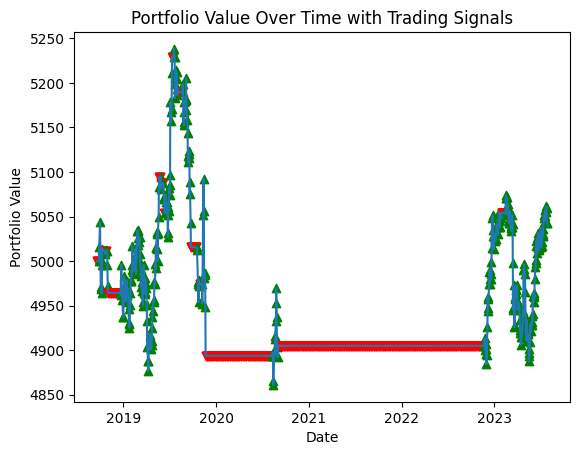

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
sbin['Returns'] = sbin['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_sbin, 90)
low_vol_threshold = np.percentile(rolling_predictions_sbin, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_sbin)):

    if rolling_predictions_sbin[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_sbin[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + sbin['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(sbin.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(sbin.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_sbin)):
    if positions[i] == 1:
        plt.scatter(sbin.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(sbin.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.5172373405390345
1.7205449248623532


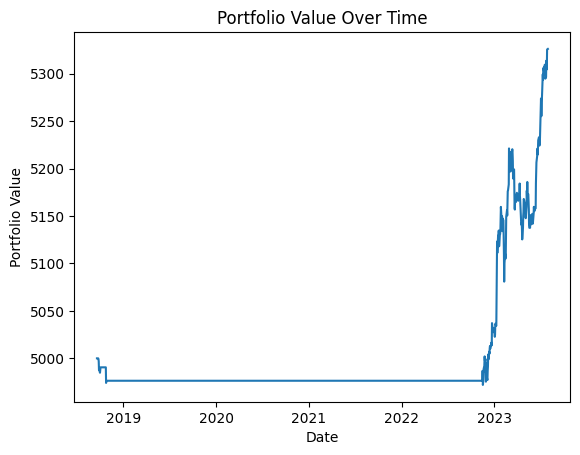

Final Portfolio Value: $ 5325.980114390076


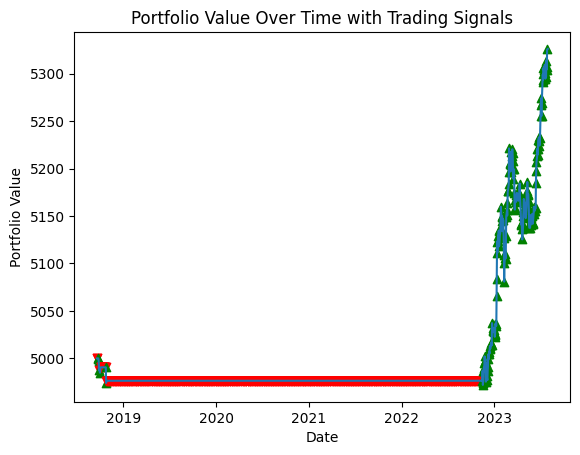

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
ioc['Returns'] = ioc['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_bharti, 90)
low_vol_threshold = np.percentile(rolling_predictions_bharti, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_bharti)):

    if rolling_predictions_bharti[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_bharti[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + ioc['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(ioc.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(ioc.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_bharti)):
    if positions[i] == 1:
        plt.scatter(ioc.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(ioc.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




3.122765420598744
1.6120603627167396


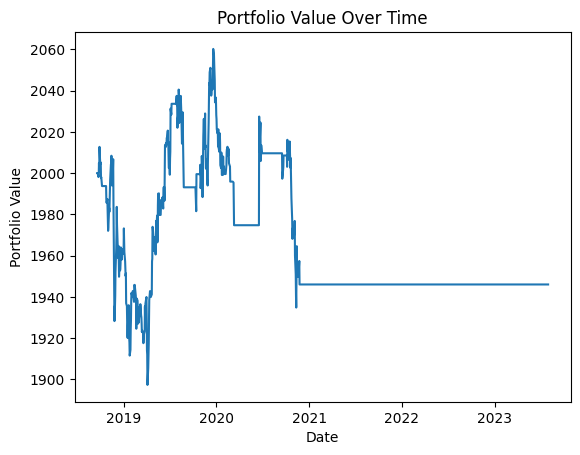

Final Portfolio Value: $ 1946.0303405736536


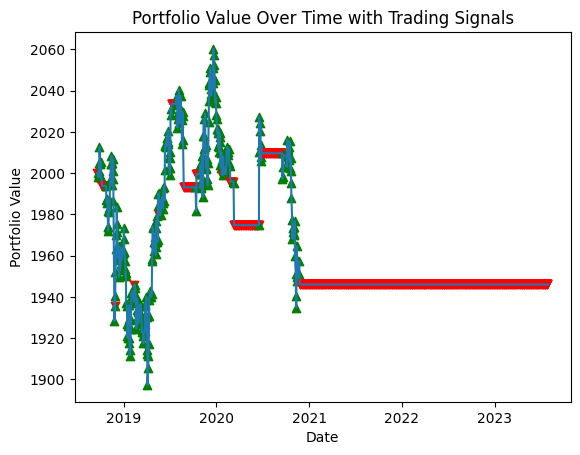

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
ongc['Returns'] = ongc['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_ongc, 90)
low_vol_threshold = np.percentile(rolling_predictions_ongc, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 2000  # Initial cash balance
portfolio_value = [2000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_ongc)):

    if rolling_predictions_ongc[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_ongc[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + ongc['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(ongc.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(ongc.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_ongc)):
    if positions[i] == 1:
        plt.scatter(ongc.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(ongc.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




1.8451463065921039
1.17929524304113


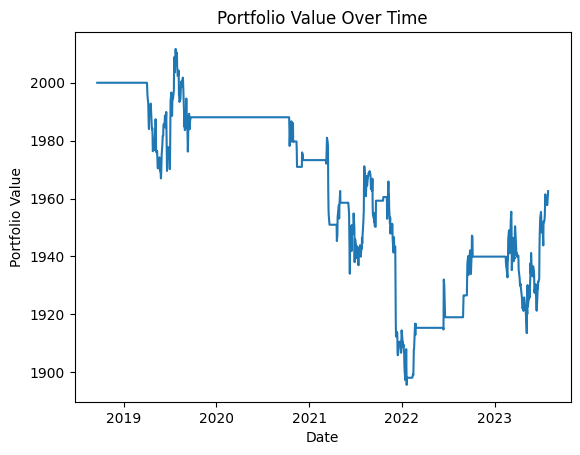

Final Portfolio Value: $ 1962.5689462076039


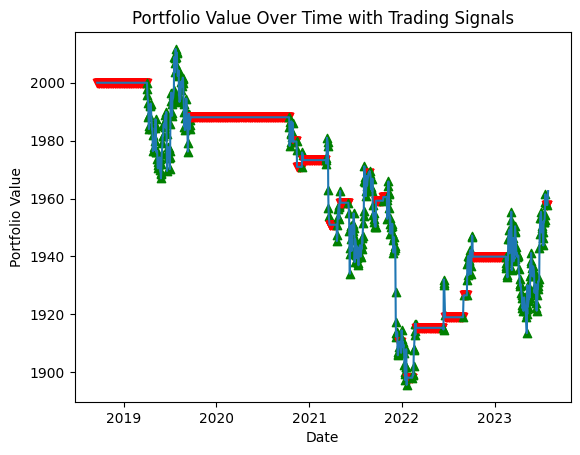

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
hindul['Returns'] = hindul['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_hindul, 90)
low_vol_threshold = np.percentile(rolling_predictions_hindul, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 2000  # Initial cash balance
portfolio_value = [2000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_hindul)):

    if rolling_predictions_hindul[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_hindul[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + hindul['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(hindul.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(hindul.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_hindul)):
    if positions[i] == 1:
        plt.scatter(hindul.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(hindul.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.1828227563601095
1.2630928575174385


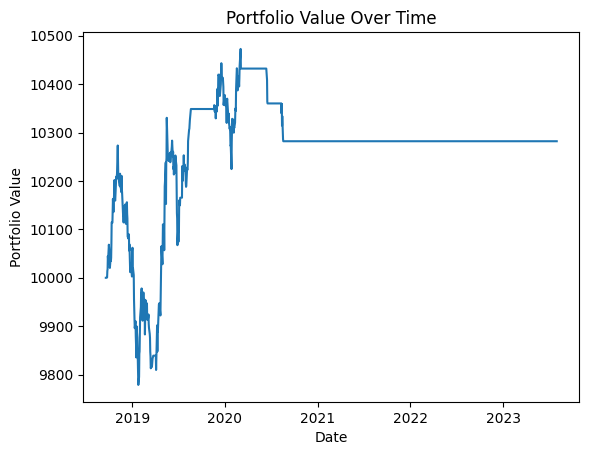

Final Portfolio Value: $ 10281.998710550442


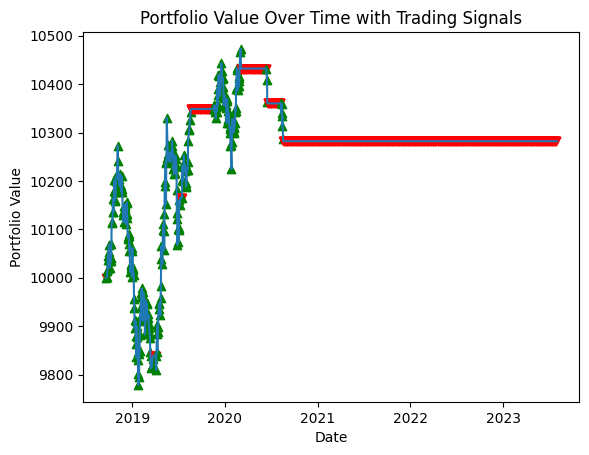

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
ntpc['Returns'] = ntpc['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_ntpc, 90)
low_vol_threshold = np.percentile(rolling_predictions_ntpc, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_ntpc)):

    if rolling_predictions_ntpc[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_ntpc[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + ntpc['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(ntpc.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(ntpc.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_ntpc)):
    if positions[i] == 1:
        plt.scatter(ntpc.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(ntpc.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.626962715427046
1.5758341435841439


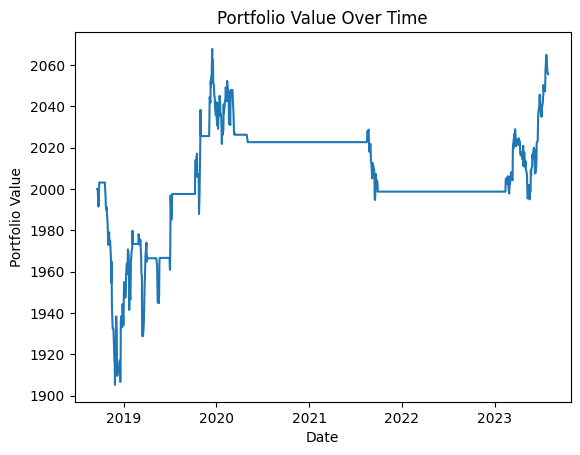

Final Portfolio Value: $ 2055.5636686381795


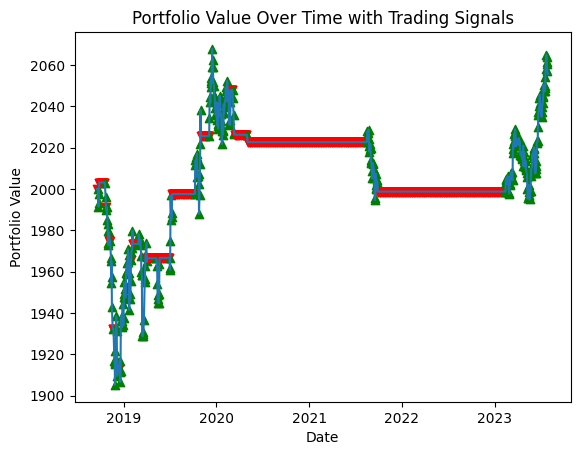

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
maruti['Returns'] = maruti['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_maruti, 90)
low_vol_threshold = np.percentile(rolling_predictions_maruti, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 2000  # Initial cash balance
portfolio_value = [2000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_maruti)):

    if rolling_predictions_maruti[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_maruti[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + maruti['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(maruti.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(maruti.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_maruti)):
    if positions[i] == 1:
        plt.scatter(maruti.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(maruti.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.446671257533209
1.67701043076441


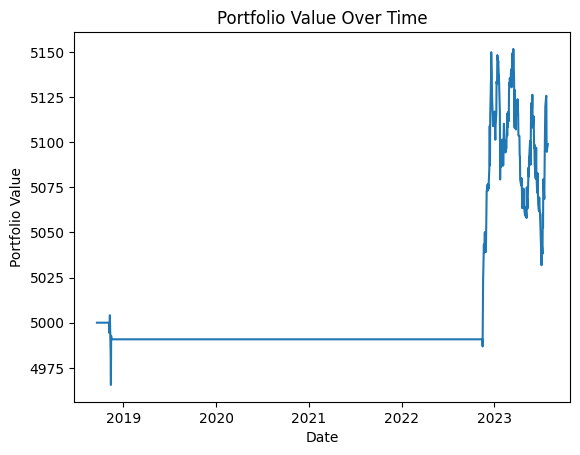

Final Portfolio Value: $ 5098.947841863262


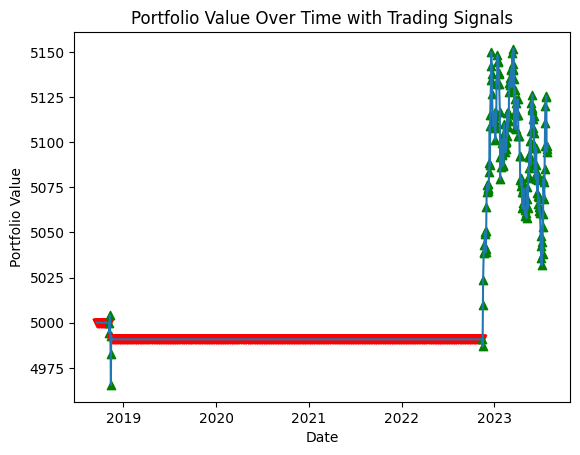

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
sunpharma['Returns'] = sunpharma['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_sunpharma, 90)
low_vol_threshold = np.percentile(rolling_predictions_sunpharma, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_sunpharma)):

    if rolling_predictions_sunpharma[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_sunpharma[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + sunpharma['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(sunpharma.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(sunpharma.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_sunpharma)):
    if positions[i] == 1:
        plt.scatter(sunpharma.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(sunpharma.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.8400524924811696
1.9437602932456652


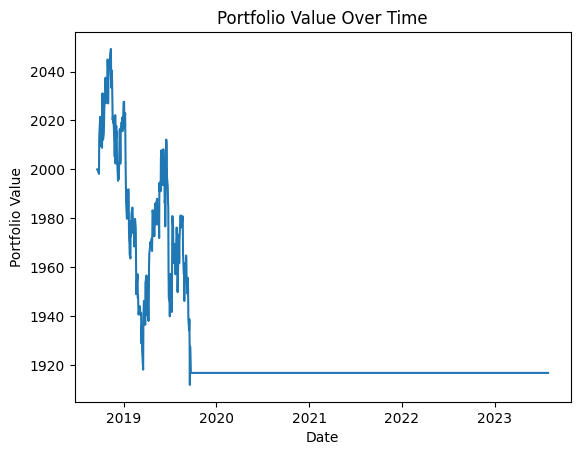

Final Portfolio Value: $ 1916.7934524289626


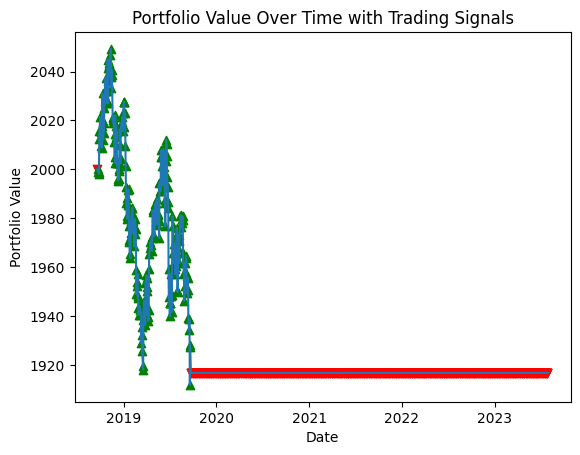

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
tatasteel['Returns'] = tatasteel['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_tatasteel, 90)
low_vol_threshold = np.percentile(rolling_predictions_tatasteel, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 2000  # Initial cash balance
portfolio_value = [2000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_tatasteel)):

    if rolling_predictions_tatasteel[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_tatasteel[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + tatasteel['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(tatasteel.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(tatasteel.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_tatasteel)):
    if positions[i] == 1:
        plt.scatter(tatasteel.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(tatasteel.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




4.231542714691821
1.6820104660219626


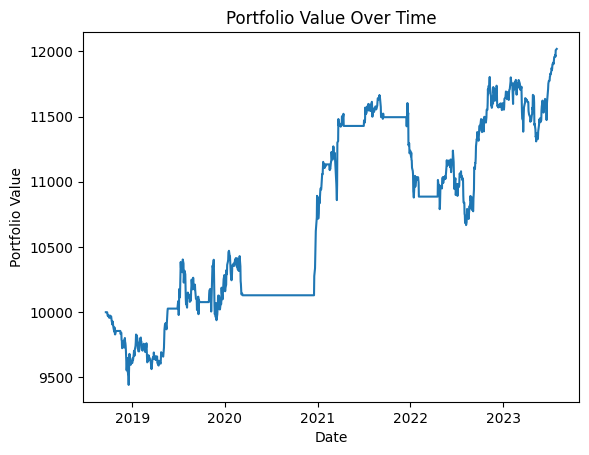

Final Portfolio Value: $ 12018.504706991698


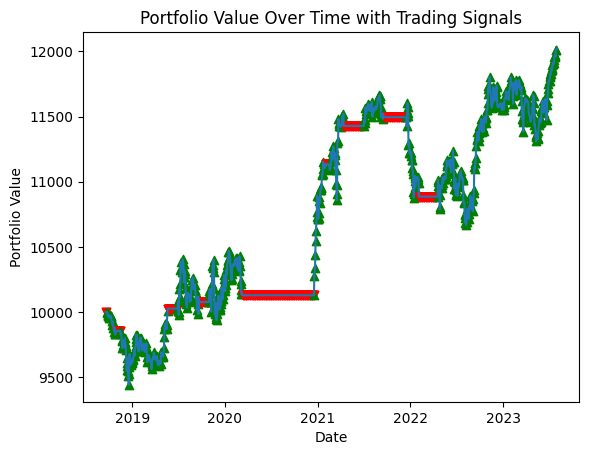

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
indus['Returns'] = indus['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_indus, 90)
low_vol_threshold = np.percentile(rolling_predictions_indus, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_indus)):

    if rolling_predictions_indus[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_indus[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + indus['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(indus.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(indus.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_indus)):
    if positions[i] == 1:
        plt.scatter(indus.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(indus.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.5172373405390345
1.7205449248623532


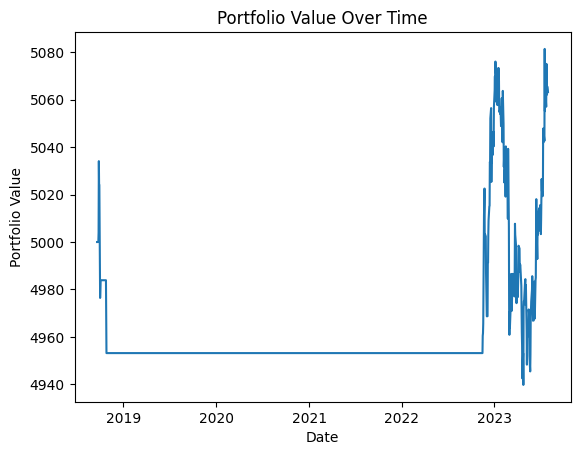

Final Portfolio Value: $ 5063.1638354634615


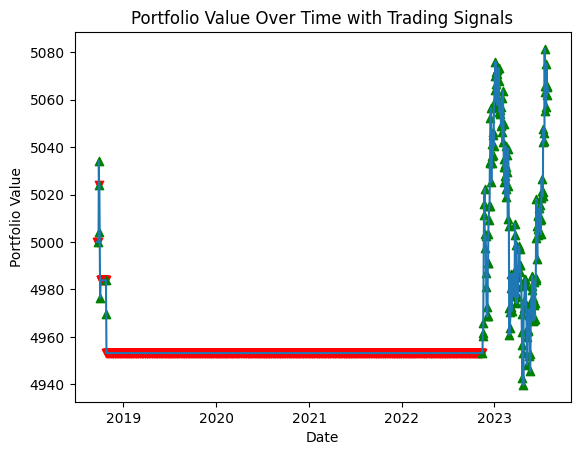

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
bharti['Returns'] = bharti['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_bharti, 90)
low_vol_threshold = np.percentile(rolling_predictions_bharti, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 5000  # Initial cash balance
portfolio_value = [5000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_bharti)):

    if rolling_predictions_bharti[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_bharti[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + bharti['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(bharti.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(bharti.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_bharti)):
    if positions[i] == 1:
        plt.scatter(bharti.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(bharti.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




2.841476798600519
1.5667395081047422


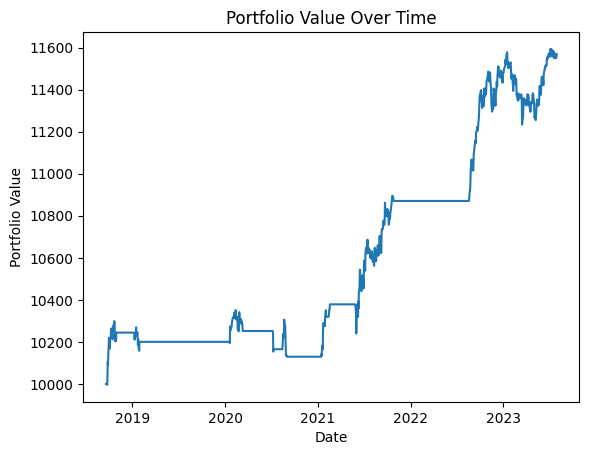

Final Portfolio Value: $ 11568.460780348969


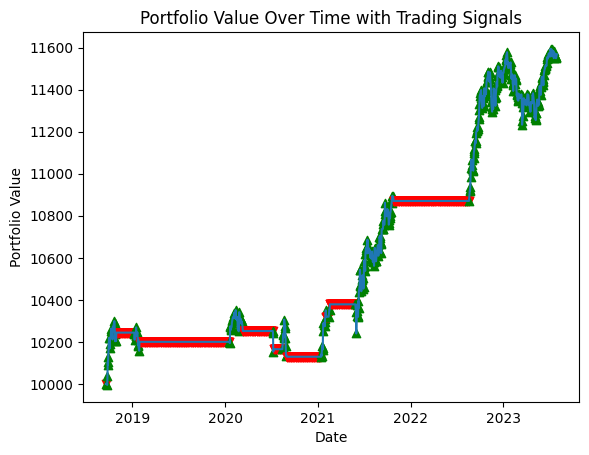

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import arch as arch_model


# Calculate Returns
icici['Returns'] = icici['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_icici, 90)
low_vol_threshold = np.percentile(rolling_predictions_icici, 10)
print(high_vol_threshold)
print(low_vol_threshold)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_icici)):

    if rolling_predictions_icici[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_icici[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position


    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + icici['Returns'][i])
    portfolio_value.append(cash)

# Visualize Portfolio Value
plt.plot(icici.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]

# Print summary
print("Final Portfolio Value: $", final_portfolio_value)
# Visualize Portfolio Value with Trading Signals
plt.plot(icici.index[-1201:], portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time with Trading Signals')

# Plot Trading Signals
for i in range(len(rolling_predictions_icici)):
    if positions[i] == 1:
        plt.scatter(icici.index[-1201:][i], portfolio_value[i], color='green', marker='^', label='Buy Signal')
    elif positions[i] == 0:
        plt.scatter(icici.index[-1201:][i], portfolio_value[i], color='red', marker='v', label='Sell Signal')

plt.show()




Sharpe Ratio: -0.4123255452395395
Turnover: 339.44873269346135 %


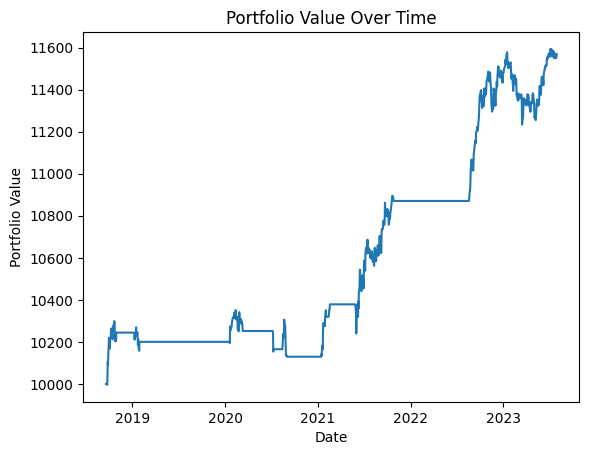

In [303]:
import numpy as np

# Calculate Returns
icici['Returns'] = icici['Adj Close'].pct_change()

# Define Volatility Thresholds
high_vol_threshold = np.percentile(rolling_predictions_icici, 90)
low_vol_threshold = np.percentile(rolling_predictions_icici, 10)

#Trading Strategy
positions = [0]  # Stores trading positions (1 for long, 0 for cash)
cash = 10000  # Initial cash balance
portfolio_value = [10000]  # Stores portfolio value over time

for i in range(len(rolling_predictions_icici)):

    if rolling_predictions_icici[i] > high_vol_threshold:
        positions.append(0)

    elif rolling_predictions_icici[i] < low_vol_threshold:
        positions.append(1)
    else:
        positions.append(positions[-1])  # Maintain current position

    # Adjust position size based on portfolio value
    position_size = cash * 0.2  # Allocate 10% of portfolio value to each position

    # Update portfolio value based on trading positions and returns
    if positions[i] == 1:
        cash -= position_size
        cash += position_size * (1 + icici['Returns'][i])
    portfolio_value.append(cash)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    risk_free_rate = 0.01  # Example risk-free rate (replace with actual risk-free rate)
    average_return = np.mean(returns)
    std_dev = np.std(returns)
    sharpe_ratio = (average_return - risk_free_rate) / std_dev
    return sharpe_ratio

# Get returns excluding the first element which is NaN
returns = icici['Returns'][1:]

sharpe_ratio = calculate_sharpe_ratio(returns)
print("Sharpe Ratio:", sharpe_ratio)

# Calculate Turnover
value_of_purchases = 0  # Initialize value of purchases
value_of_sales = 0  # Initialize value of sales

for i in range(1, len(positions)):
    if positions[i] != positions[i - 1]:
        if positions[i] == 1:
            value_of_purchases += position_size
        else:
            value_of_sales += position_size

total_portfolio_value = portfolio_value[-1]
turnover = ((value_of_purchases + value_of_sales) / total_portfolio_value) * 100
print("Turnover:", turnover, "%")

# Visualize Portfolio Value
plt.plot(icici.index[-1201:], portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

final_portfolio_value = portfolio_value[-1]


In [296]:
import pandas as pd

# Sample data
data = {
    'Stock Name': ['dis','tcs', 'rela', 'hdfc', 'infy', 'adani', 'icici', 'kotak', 'lt', 'axis', 'sbin', 'ioc', 'bharti', 'ongc', 'hindul', 'ntpc', 'maruti', 'sunpharma', 'tatasteel', 'indus'],
    'Invested Amount': [2000, 5000, 10000, 5000, 5000, 10000, 10000, 10000, 2000, 5000, 5000, 5000,5000, 2000, 2000,10000, 2000, 5000, 2000, 10000,],  # Example invested amounts for each stock
    'Return Amount': [1973.68, 5019.51, 11898.73, 5230.98, 5192.81, 11928.04, 11568.46, 11079.59, 1925.32, 5315.37, 5039.29, 5325.98, 5063.26, 1946.03, 1862.56, 10281.99, 2055.56, 5098.94, 1916.79, 12018.50]      # Example return amounts for each stock
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate return percentage
df['Return Percentage'] = ((df['Return Amount'] - df['Invested Amount']) / df['Invested Amount']) * 100

# Display the DataFrame
print(df)

total_invested=sum(df['Invested Amount'])
total_return=sum(df['Return Amount'])
profit=(total_return- total_invested)/total_invested
print("total profit is ", profit*100)

   Stock Name  Invested Amount  Return Amount  Return Percentage
0         dis             2000        1973.68            -1.3160
1         tcs             5000        5019.51             0.3902
2        rela            10000       11898.73            18.9873
3        hdfc             5000        5230.98             4.6196
4        infy             5000        5192.81             3.8562
5       adani            10000       11928.04            19.2804
6       icici            10000       11568.46            15.6846
7       kotak            10000       11079.59            10.7959
8          lt             2000        1925.32            -3.7340
9        axis             5000        5315.37             6.3074
10       sbin             5000        5039.29             0.7858
11        ioc             5000        5325.98             6.5196
12     bharti             5000        5063.26             1.2652
13       ongc             2000        1946.03            -2.6985
14     hindul            